# 작업 환경 준비

In [ ]:
#구글 드라이브 접속 권한 획득
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#ubuntu 업데이트
!apt-get update

#셀레늄 패키지 다운
!pip install selenium

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Reading package lists... Done
Looking in indexes: https://pypi.org/simple, https:

In [ ]:
#크롬드라이버 다운
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (103.0.5060.134-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 55 not upgraded.
cp: '/usr/lib/chromium-browser/chromedriver' and '/usr/bin/chromedriver' are the same file


In [ ]:
#크롬드라이버 경로 설정
import sys
sys.path.insert(0, '/usr/lib/chromium-browser/chromedriver')

In [ ]:
#코랩에서 작동하도록 옵션 설정
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [ ]:
#크롬드라이버 경로 설정
import sys
sys.path.insert(0, r'C:\Users\JUNGGEONWOO\Downloads\chromedriver_win32')

In [ ]:
!pip install selenium
!pip install webdriver_manager

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.11
    Uninstalling urllib3-1.26.11:
      Successfully uninstalled urllib3-1.26.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.3.0 requires urllib3[secure,socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.


In [ ]:
#필요한 모듈 import
import selenium
import requests
import pandas as pd
from selenium import webdriver
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
import time
from matplotlib import rcParams

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
# 셀레늄 버전 4 되면서 import 해야 하는 것들
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

#셀레늄에서 html 문서가 생성될 때까지 대기하는 함수 불러오기
from selenium.webdriver.support.ui import WebDriverWait

#셀레늄에서 조건을 걸어줄 수 있는 함수 불러오기
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

# 파일 불러오기 & 전처리

In [ ]:
Seoul_22_1Q = pd.read_csv('/content/drive/MyDrive/소상공인데이터/소상공인시장진흥공단_상가(상권)정보_서울_202203.csv')

In [ ]:
Seoul_22_1Q.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [ ]:
# 중복되거나 불필요한 변수를 drop 해줍니다.
Seoul_22_1Q.drop(labels=['상권업종대분류코드' ,'상권업종중분류코드','상권업종소분류코드','표준산업분류코드','시도코드','시도명','시군구코드','행정동코드','행정동명','법정동코드','법정동명','지번코드','대지구분코드','대지구분명','지번본번지','지번부번지','도로명코드','도로명','건물본번지','건물부번지','건물관리번호','건물명','도로명주소','구우편번호','신우편번호'], axis=1, inplace=True)
Seoul_22_1Q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330827 entries, 0 to 330826
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상가업소번호    330827 non-null  int64  
 1   상호명       330827 non-null  object 
 2   지점명       58133 non-null   object 
 3   상권업종대분류명  330827 non-null  object 
 4   상권업종중분류명  330827 non-null  object 
 5   상권업종소분류명  330827 non-null  object 
 6   표준산업분류명   310386 non-null  object 
 7   시군구명      330827 non-null  object 
 8   지번주소      330827 non-null  object 
 9   동정보       34269 non-null   object 
 10  층정보       200833 non-null  object 
 11  호정보       0 non-null       float64
 12  경도        330827 non-null  float64
 13  위도        330827 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 35.3+ MB


In [ ]:
# 변수의 type에 맞게 0으로 fillna 해줍니다.
Seoul_22_1Q["지점명"] = Seoul_22_1Q["지점명"].fillna("0")
Seoul_22_1Q["표준산업분류명"] = Seoul_22_1Q["표준산업분류명"].fillna("0")
Seoul_22_1Q["동정보"] = Seoul_22_1Q["동정보"].fillna("0")
Seoul_22_1Q["층정보"] = Seoul_22_1Q["층정보"].fillna("0")
Seoul_22_1Q["호정보"] = Seoul_22_1Q["호정보"].fillna(0)

In [ ]:
# 위 과정을 함수로 정의해줍니다.
def preprocessing(data):
    data.drop(labels=['상권업종대분류코드' ,'상권업종중분류코드','상권업종소분류코드','표준산업분류코드','시도코드','시도명','시군구코드','행정동코드','행정동명','법정동코드','법정동명','지번코드','대지구분코드','대지구분명','지번본번지','지번부번지','도로명코드','도로명','건물본번지','건물부번지','건물관리번호','건물명','도로명주소','구우편번호','신우편번호'], axis=1, inplace=True)
    data["지점명"] = data["지점명"].fillna("0")
    data["표준산업분류명"] = data["표준산업분류명"].fillna("0")
    data["동정보"] = data["동정보"].fillna("0")
    data["층정보"] = data["층정보"].fillna("0")
    data["호정보"] = data["호정보"].fillna(0)

In [ ]:
# 구 별로 상가의 분포를 시각화합니다.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 여기까지 실행하고 런타임 재시작 해줘야 합니다.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 55 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


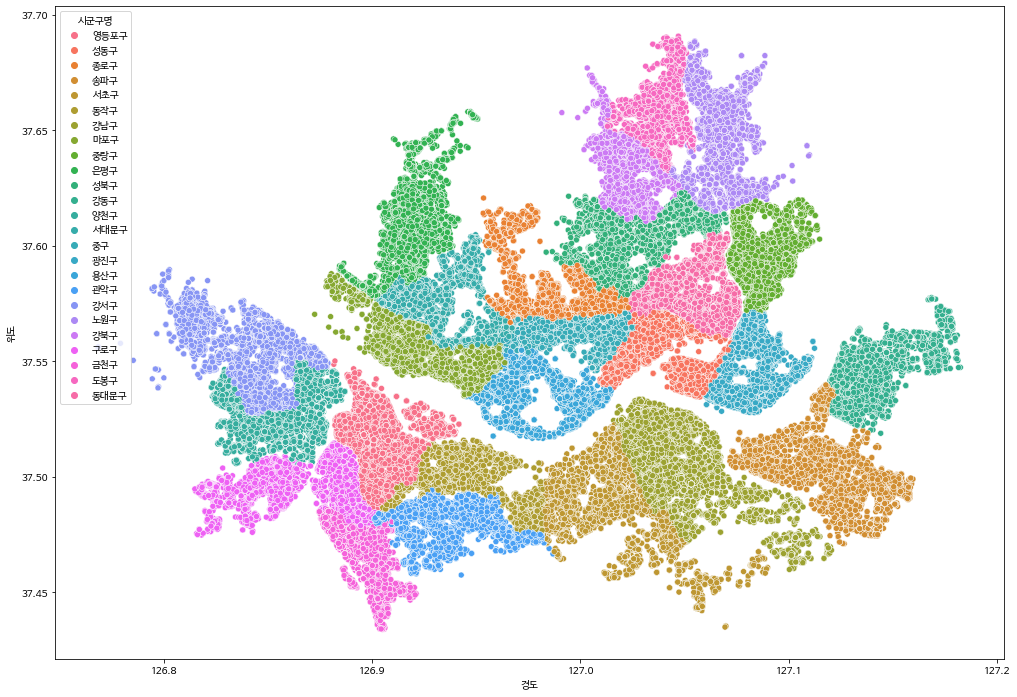

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(17,12))
ax = sns.scatterplot(data=Seoul_22_1Q, x='경도',y='위도', hue="시군구명")
plt.show()

In [ ]:
Gyeonggi_22_1Q_ = pd.read_csv('/content/drive/MyDrive/소상공인데이터/소상공인시장진흥공단_상가(상권)정보_경기_202203.csv')

In [ ]:
preprocessing(Gyeonggi_22_1Q_)

# <서울>

## 2022년 서울  : 업종별/지역별 상가 수

In [ ]:
# 일단 크게 '상권업종대분류명'으로 pivot table 봅니다.
pivot_Seoul_22_1Q = pd.pivot_table(data=Seoul_22_1Q, index="시군구명", columns="상권업종대분류명", values="상가업소번호", aggfunc=['count'], margins=True, margins_name='합계')

In [ ]:
pivot_Seoul_22_1Q["count"].reset_index(inplace=True)
pivot_Seoul_22_1Q["count"]

상권업종대분류명,관광/여가/오락,부동산,생활서비스,소매,숙박,스포츠,음식,학문/교육,합계
시군구명,,,,,,,,,
강남구,677,1884,6499,7894,148,672,11115,2313,31202
강동구,363,755,2932,3414,63,233,4502,1239,13501
강북구,270,258,1616,2467,91,107,3205,506,8520
강서구,449,855,3406,4001,93,299,5968,1219,16290
관악구,387,641,2446,3050,79,204,4338,907,12052
광진구,401,680,2560,3832,67,203,4302,1013,13058
구로구,296,539,2506,3805,103,177,4102,943,12471
금천구,198,446,1902,3055,71,122,2885,520,9199
노원구,302,425,2120,3233,27,201,3784,1371,11463


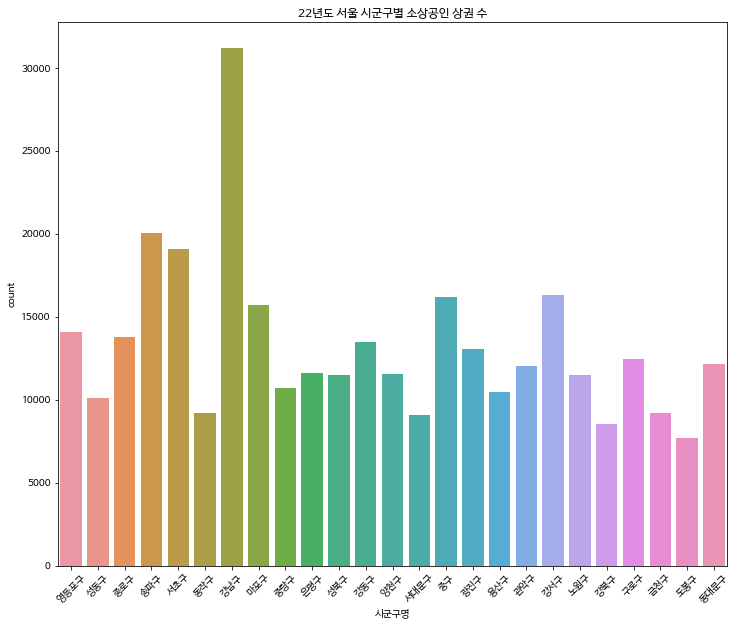

In [ ]:
rcParams['figure.figsize'] = 12,10

sns.countplot(x="시군구명", data= Seoul_22_1Q)
plt.xticks(rotation=45)
plt.title("22년도 서울 시군구별 소상공인 상권 수")
plt.show()

**서울 지역별 분석**

1) 강남구 31202개로 압도적 1위입니다.

다음으로 송파구 20036개, 서초구 19112개, 강서구 16290개 이지만 강남 3구로 묶입니다. 다 같은 동네라는 말이죠...

업종을 불문, 상가 집중도가 엄청난 곳인 것 같습니다.

2) 중구가 16209개로 많은 편인데... 중구가 서울역부터 명동, 을지로까지 포함하는 
동네라 많은 듯 합니다.

중구가 숙박이 가장 많은 구라는 점이 재밌는데, 중국인 관광객을 위한 숙소가 많은 것으로 알고 있습니다.

3) 홍대는 어떤가 해서 봤더니 마포구 15728개로 역시 많은 편이네요.

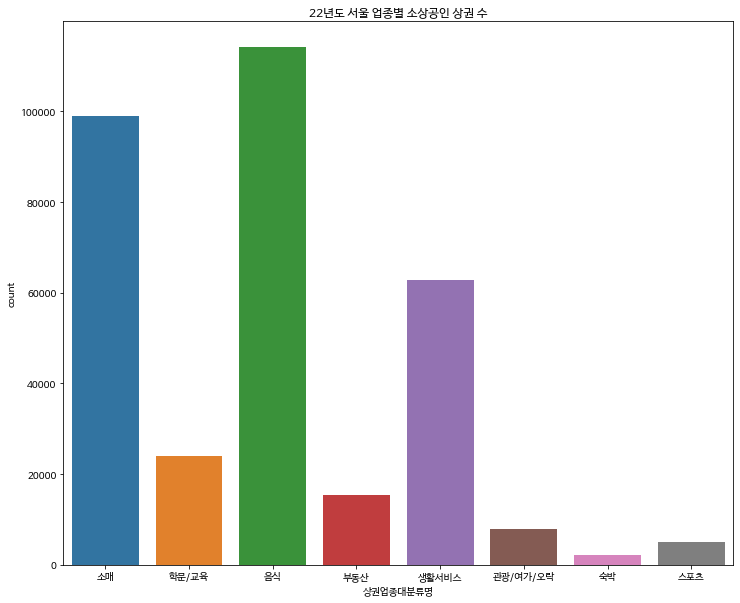

In [ ]:
rcParams['figure.figsize'] = 12,10

sns.countplot(x="상권업종대분류명", data= Seoul_22_1Q)
plt.title("22년도 서울 업종별 소상공인 상권 수")
plt.show()


**서울 업종별 분석**

1) 330827개 중 "음식점"이 114193개로 약 1/3 차지합니다.

2) "소매"가 99079개인데, 옷가게, 서점, 마트 등 음식점이 아닌 가게를 모으다보니 많은 것 같습니다.

3) "생활서비스"가 62863개인데 대부분 "미용/건강"입니다. 가게 이름 확인해보니 헤어샵이 대부분이네요.

헬스장은 스포츠로 분류되어서 "생활서비스"에 포함되지 않는데도 이 정도면... 헤어샵이 참 많은 것 같습니다.

In [ ]:
# 서울 내 업종별 분석에서 가장 많은 비중을 차지한 "음식"만 떼어내서 중분류명으로 pivot table 보겠습니다.
pivot_Seoul_food_22_1Q = pd.pivot_table(data=Seoul_22_1Q[(Seoul_22_1Q["상권업종대분류명"]=="음식")], index="시군구명", columns="상권업종중분류명", values="상가업소번호", aggfunc=['count'], margins=True, margins_name='합계')
pivot_Seoul_food_22_1Q["count"].reset_index(inplace=True)
pivot_Seoul_food_22_1Q["count"]

상권업종중분류명,기타음식업,닭/오리요리,별식/퓨전요리,부페,분식,양식,유흥주점,음식배달서비스,일식/수산물,제과제빵떡케익,중식,커피점/카페,패스트푸드,한식,합계
시군구명,,,,,,,,,,,,,,,
강남구,44.0,337.0,212.0,47.0,740.0,1149.0,851.0,11.0,950.0,448.0,300.0,2086.0,501.0,3439.0,11115
강동구,6.0,270.0,101.0,25.0,415.0,141.0,477.0,4.0,352.0,221.0,113.0,721.0,243.0,1413.0,4502
강북구,3.0,218.0,68.0,6.0,304.0,84.0,391.0,3.0,189.0,115.0,61.0,343.0,150.0,1270.0,3205
강서구,28.0,326.0,123.0,18.0,488.0,324.0,583.0,1.0,446.0,254.0,179.0,1055.0,295.0,1848.0,5968
관악구,12.0,253.0,99.0,13.0,411.0,250.0,549.0,3.0,320.0,146.0,114.0,660.0,216.0,1292.0,4338
광진구,13.0,228.0,89.0,12.0,395.0,195.0,446.0,1.0,319.0,181.0,151.0,758.0,226.0,1288.0,4302
구로구,14.0,278.0,103.0,17.0,374.0,98.0,559.0,3.0,237.0,149.0,231.0,560.0,200.0,1279.0,4102
금천구,12.0,170.0,83.0,14.0,261.0,82.0,323.0,1.0,172.0,103.0,120.0,455.0,127.0,962.0,2885
노원구,13.0,304.0,87.0,8.0,389.0,126.0,352.0,7.0,236.0,204.0,118.0,563.0,270.0,1107.0,3784


114193개 중 한식이 37194개로 약 1/3차지합니다. 카페가 19422개, 술집이 11056개이고요.

그냥 비중이 이렇다~ 정도 파악하면 될 것 같습니다.

+닭/오리 따로 떼어낸거 웃긴데 꽤 많아서 놀랐습니다. 치킨집이 정말 많네요

## 2019년~2021년 서울 : 업종별 상가 수

In [ ]:
# 팬데믹 이전과 비교를 위해 19년도, 20년도 데이터를 불러오겠습니다.
Seoul_19_1Q = pd.read_csv("/content/drive/MyDrive/소상공인데이터/소상공인시장진흥공단_상가(상권)정보_서울_201903.csv")
preprocessing(Seoul_19_1Q)

Seoul_20_1Q = pd.read_csv("/content/drive/MyDrive/소상공인데이터/소상공인시장진흥공단_상가(상권)정보_서울_202003.csv")
preprocessing(Seoul_20_1Q)

Seoul_21_1Q = pd.read_csv("/content/drive/MyDrive/소상공인데이터/소상공인시장진흥공단_상가(상권)정보_서울_202103.csv")
preprocessing(Seoul_21_1Q)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (11,13,20,22,25,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# 19~22년도 비교를 위해 동일한 형태의 pivot table을 만들겠습니다.
pivot_Seoul_19_1Q = pd.pivot_table(data=Seoul_19_1Q, index="시군구명", columns="상권업종대분류명", values="상가업소번호", aggfunc=['count'], margins=True, margins_name='합계', fill_value=0)
pivot_Seoul_20_1Q = pd.pivot_table(data=Seoul_20_1Q, index="시군구명", columns="상권업종대분류명", values="상가업소번호", aggfunc=['count'], margins=True, margins_name='합계', fill_value=0)
pivot_Seoul_21_1Q = pd.pivot_table(data=Seoul_21_1Q, index="시군구명", columns="상권업종대분류명", values="상가업소번호", aggfunc=['count'], margins=True, margins_name='합계', fill_value=0)

In [ ]:
# 연도별, 업종별 상가 수입니다.
df = pd.DataFrame([(list(pivot_Seoul_19_1Q.loc["합계"])), (list(pivot_Seoul_20_1Q.loc["합계"])), (list(pivot_Seoul_21_1Q.loc["합계"])), (list(pivot_Seoul_22_1Q.loc["합계"]))], columns=list(pivot_Seoul_20_1Q["count"].columns), index=["2019","2020","2021","2022"])

In [ ]:
df.transpose()

,2019,2020,2021,2022
관광/여가/오락,11578,11714,7089,7902
부동산,15430,15778,13336,15485
생활서비스,64344,68002,54551,62863
소매,124782,126954,89841,99079
숙박,3047,3131,2446,2258
스포츠,130,240,631,5119
음식,131687,134041,125811,114193
학문/교육,31247,31640,21850,23928
합계,382245,391500,315555,330827


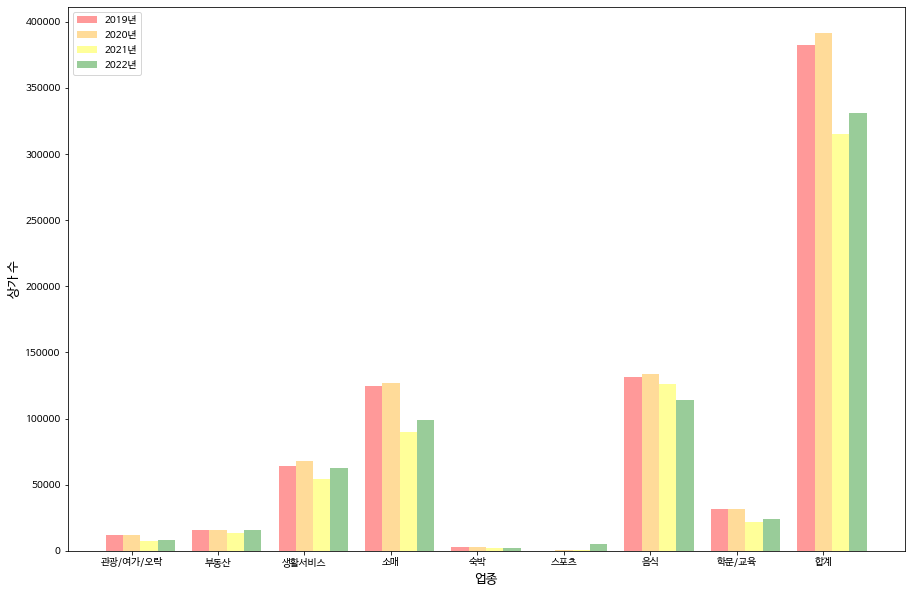

In [ ]:
# 연도별 업종별 상가 수를 막대그래프로 보겠습니다.

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(15,10))
bar_width = 0.2
index = np.arange(9) # 업종 수

# 각 업종로 4개 년도의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df.transpose()['2019'], bar_width, alpha=0.4, color='red', label='2019년')
b2 = plt.bar(index + bar_width, df.transpose()['2020'], bar_width, alpha=0.4, color='orange', label='2020년')
b3 = plt.bar(index + 2 * bar_width, df.transpose()['2021'], bar_width, alpha=0.4, color='yellow', label='2021년')
b4 = plt.bar(index + 3 * bar_width, df.transpose()['2022'], bar_width, alpha=0.4, color='green', label='2022년')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 9 + bar_width, 1), list(df.transpose().index))

# x축, y축 이름 및 범례 설정
plt.xlabel('업종', size = 13)
plt.ylabel('상가 수', size = 13)
plt.legend()
plt.show()

 숙박이나 스포츠는 절대적인 수가 적어 변화의 추이가 보이지 않습니다.

 변화율로 접근해볼 필요가 있다고 판단됩니다.

In [ ]:
# 업종별로 상가 수 "변화율"을 보겠습니다.
sectors=[]
per_change1920=[]
per_change2021=[]
per_change2122=[]
for i in range(0,len(pivot_Seoul_22_1Q.columns)):
    sectors.append(((pivot_Seoul_22_1Q.loc["합계"]-pivot_Seoul_19_1Q.loc["합계"])/(pivot_Seoul_19_1Q.loc["합계"])*100).keys()[i][1])
    per_change1920.append(((pivot_Seoul_20_1Q.loc["합계"]-pivot_Seoul_19_1Q.loc["합계"])/(pivot_Seoul_19_1Q.loc["합계"])*100)[i])
    per_change2021.append(((pivot_Seoul_21_1Q.loc["합계"]-pivot_Seoul_20_1Q.loc["합계"])/(pivot_Seoul_20_1Q.loc["합계"])*100)[i])
    per_change2122.append(((pivot_Seoul_22_1Q.loc["합계"]-pivot_Seoul_21_1Q.loc["합계"])/(pivot_Seoul_21_1Q.loc["합계"])*100)[i])
df_per_change = pd.DataFrame(np.round([per_change1920,per_change2021,per_change2122],2), columns=sectors, index=["2019-2020", "2020-2021", "2021-2022"]).transpose()
df_per_change

,2019-2020,2020-2021,2021-2022
관광/여가/오락,1.17,-39.48,11.47
부동산,2.26,-15.48,16.11
생활서비스,5.69,-19.78,15.24
소매,1.74,-29.23,10.28
숙박,2.76,-21.88,-7.69
스포츠,84.62,162.92,711.25
음식,1.79,-6.14,-9.23
학문/교육,1.26,-30.94,9.51
합계,2.42,-19.40,4.84


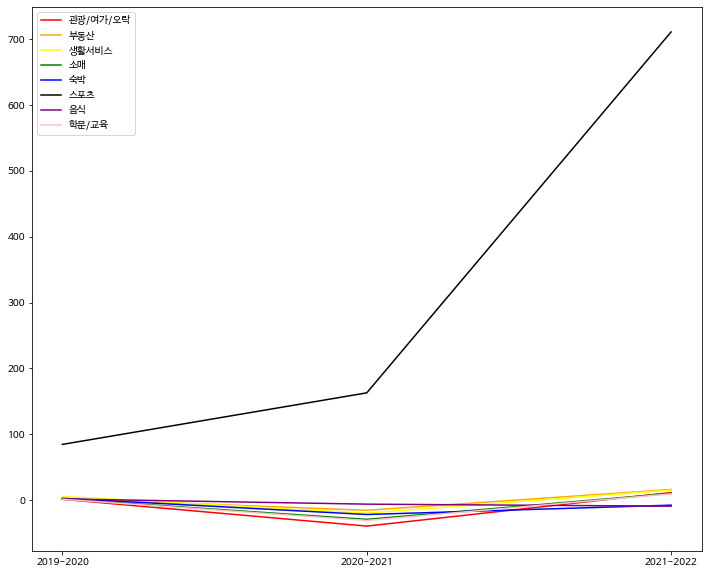

In [ ]:
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['관광/여가/오락'], color = 'red')
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['부동산'], color = 'orange')
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['생활서비스'], color = 'yellow')
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['소매'], color = 'green')
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['숙박'], color = 'blue')
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['스포츠'], color = 'black')
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['음식'], color = 'purple')
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['학문/교육'], color = 'pink')
plt.legend(df_per_change.transpose().columns)
plt.show()

스포츠는 절대적 수가 적어 큰 증가율을 보여주고 있습니다.

시각화에서는 잠깐 빼도록 하겠습니다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


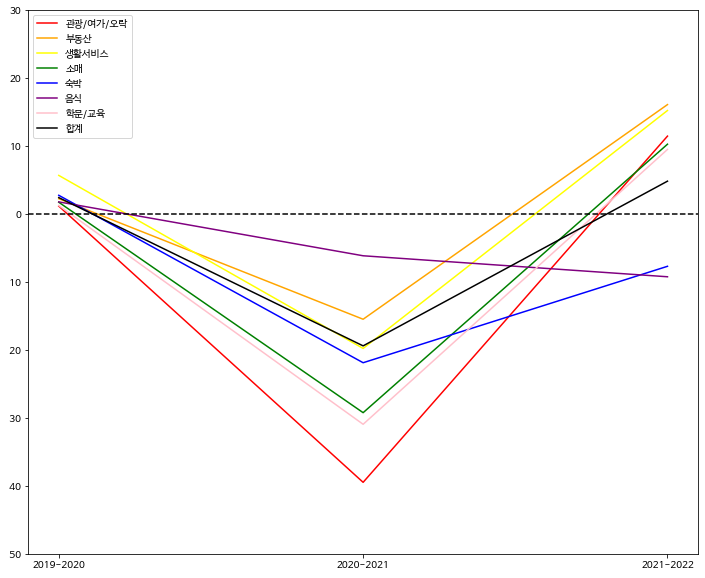

In [ ]:
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['관광/여가/오락'], color = 'red')
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['부동산'], color = 'orange')
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['생활서비스'], color = 'yellow')
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['소매'], color = 'green')
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['숙박'], color = 'blue')
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['음식'], color = 'purple')
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['학문/교육'], color = 'pink')
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['합계'], color = 'black')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend(df_per_change.transpose().drop(["스포츠"], axis=1).columns)
plt.axis([-0.1, 2.1, -50, 30])
plt.show()

스포츠를 제외하면 모든 업종에서 2019-2020 변화율은 크지 않습니다.

코로나 19 이후 2020년에는 타격을 입는 중이었던 것으로 해석됩니다.

하지만 2021년 모든 업종에서 상가 수가 감소했습니다.

특히 관광/여가/오락 업종에서 큰 감소세를 보였습니다.

2022년에는 대부분의 업종에서 다시 증가세로 돌아왔지만,

그 정도가 미미하여 2021년의 감소폭을 회복하지 못하고 있습니다.

심지어 **음식과 숙박** 업종에서는 아직 미미한 감소세에 머무르고 있습니다.

## 웹 크롤링으로 Seoul.csv 만들기

In [ ]:
# 웹 드라이버 객체 생성
browser = webdriver.Chrome('chromedriver', options = options)

In [ ]:
# 페이지 접속
browser.get('https://sg.sbiz.or.kr/godo/stat/upso.sg')

In [ ]:
# 지역 선택
browser.find_element("xpath","/html/body/div[1]/div[2]/div[1]/div[2]/div/div/div[1]/div/div[1]/ul/li[1]/div/div[2]/a").click()

In [ ]:
# 서울 선택
browser.find_element("xpath","/html/body/div[2]/div/div[2]/div/div[1]/div/ul/li[1]/div/ul/li[2]/label").click()

In [ ]:
# 구 전체
browser.find_element("xpath","/html/body/div[2]/div/div[2]/div/div[1]/div/ul/li[2]/div/ul/li[1]/label").click()

In [ ]:
# 확인
browser.find_element("xpath","/html/body/div[2]/div/div[2]/div/div[2]/a[2]/span").click()

In [ ]:
# 현황 보기
browser.find_element("xpath","/html/body/div[1]/div[2]/div[1]/div[2]/div/div/div[1]/div/div[2]/a/span").click()

In [ ]:
# 크롤링
y= browser.find_elements(By.CSS_SELECTOR,'#upsoTable > tr > td')

In [ ]:
# 페이지에 있는 표에서, 각각 열을 하나의 리스트로 받아서 리스트를 붙여서 Dataframe으로 만들 계획

# 빈 리스트 만들어주고
i = 0
district = []
Seoul_2021_1_6 = []
Seoul_2021_7_12 = []
Seoul_per_change = []

# 같은 열에 있는 값끼리 모아서 열마다 리스트를 만듬
for x in y :
    if (i == 0) or (i%4 ==0):
        district.append(x.text)
    elif (i%4 ==1):
        Seoul_2021_1_6.append(x.text)
    elif (i%4 ==2):
        Seoul_2021_7_12.append(x.text)
    else:
        Seoul_per_change.append(x.text)
    i += 1


In [ ]:
district

['서울특별시',
 '┗ 종로구',
 '┗ 중구',
 '┗ 용산구',
 '┗ 성동구',
 '┗ 광진구',
 '┗ 동대문구',
 '┗ 중랑구',
 '┗ 성북구',
 '┗ 강북구',
 '┗ 도봉구',
 '┗ 노원구',
 '┗ 은평구',
 '┗ 서대문구',
 '┗ 마포구',
 '┗ 양천구',
 '┗ 강서구',
 '┗ 구로구',
 '┗ 금천구',
 '┗ 영등포구',
 '┗ 동작구',
 '┗ 관악구',
 '┗ 서초구',
 '┗ 강남구',
 '┗ 송파구',
 '┗ 강동구']

In [ ]:
# 확인 결과, 지역 이름에는 ┗ 가 붙어 있음. 혹시 모르니 제거
for i in range(len(district)):
    if district[i].startswith("┗"):
        district[i] = district[i][2:]

In [ ]:
# DataFrame 만들기
Seoul_df = pd.DataFrame([district, Seoul_2021_1_6, Seoul_2021_7_12, Seoul_per_change]).transpose()
Seoul_df.columns=["행정구역","21'상","21'하","증감률"]

In [ ]:
Seoul_df

,행정구역,21'상,21'하,증감률
0,서울특별시,"346,631","340,568",-1.75%
1,종로구,"13,289","13,180",-0.82%
2,중구,"16,473","16,293",-1.09%
3,용산구,"11,076","10,718",-3.23%
4,성동구,"10,290","10,348",0.56%
5,광진구,"14,474","13,285",-8.21%
6,동대문구,"12,490","12,177",-2.51%
7,중랑구,"10,720","10,852",1.23%
8,성북구,"12,715","12,621",-0.74%
9,강북구,"7,952","8,210",3.24%


이제 지역현황을 추가적으로 불러와서 DataFrame에 붙이겠습니다.

In [ ]:
# 웹 드라이버 객체 생성
browser = webdriver.Chrome('chromedriver', options = options)

In [ ]:
# 페이지 접속
browser.get("https://sg.sbiz.or.kr/godo/stat/area.sg")

In [ ]:
# 지역 선택
browser.find_element("xpath","/html/body/div[1]/div[2]/div[1]/div[2]/div/div/div[1]/div/div[1]/ul/li[1]/div/div[2]/a").click()

In [ ]:
# 서울 선택
browser.find_element("xpath","/html/body/div[2]/div/div[2]/div/div[1]/div/ul/li[1]/div/ul/li[2]/label").click()

In [ ]:
# 구 전체
browser.find_element("xpath","/html/body/div[2]/div/div[2]/div/div[1]/div/ul/li[2]/div/ul/li[1]/label").click()

In [ ]:
# 확인
browser.find_element("xpath","/html/body/div[2]/div/div[2]/div/div[2]/a[2]/span").click()

In [ ]:
# 현황 보기
browser.find_element("xpath","/html/body/div[1]/div[2]/div[1]/div[2]/div/div/div[1]/div/div[2]/a/span").click()

In [ ]:
# 크롤링
Y= browser.find_elements(By.CSS_SELECTOR,'#tableBody > tr > td')

In [ ]:
# District는 아까 만들었으니 pass, 나머지 열은 동일한 방식

i=0
Seoul_households = []
Seoul_population = []
Seoul_facilities = []
Seoul_attrac_fac = []
Seoul_area = []
Seoul_store = []
Seoul_store_house = []
Seoul_fac_house = []
for x in Y:
    if (i == 0) or (i%9 ==0):
        pass
    elif (i%9 == 1):
        Seoul_households.append(x.text)
    elif (i%9 == 2):
        Seoul_population.append(x.text)
    elif (i%9 == 3):
        Seoul_facilities.append(x.text)
    elif (i%9 == 4):
        Seoul_attrac_fac.append(x.text)
    elif (i%9 == 5):
        Seoul_area.append(x.text)
    elif (i%9 == 6):
        Seoul_store.append(x.text)
    elif (i%9 == 7):
        Seoul_store_house.append(x.text)
    else:
        Seoul_fac_house.append(x.text)
    i +=1

In [ ]:
# DataFrame 만들기
Seoul_df2 = pd.DataFrame([Seoul_households, Seoul_population, Seoul_facilities, Seoul_attrac_fac, Seoul_area, Seoul_store, Seoul_store_house, Seoul_fac_house]).transpose()
Seoul_df2.columns=["총가구수", "총인구수","주요시설수","집객시설수","아파트 면적당 기준시가","업소수","업소당가구수","업소당시설물수"]

In [ ]:
Seoul = pd.concat([Seoul_df,Seoul_df2], axis=1)

In [ ]:
Seoul

,행정구역,21'상,21'하,증감률,총가구수,총인구수,주요시설수,집객시설수,아파트 면적당 기준시가,업소수,업소당가구수,업소당시설물수
0,서울특별시,"346,631","340,568",-1.75%,"4,178,446","9,957,557","30,681","37,052","9,590,383","355,260",12,0.19
1,종로구,"13,289","13,180",-0.82%,"73,063","154,995","1,084","2,665","7,908,133","16,079",5,0.23
2,중구,"16,473","16,293",-1.09%,"57,901","122,273","1,150","4,127","9,151,212","20,971",3,0.25
3,용산구,"11,076","10,718",-3.23%,"107,467","232,912",762,"1,081","14,679,558","11,123",10,0.17
4,성동구,"10,290","10,348",0.56%,"126,703","296,259",929,918,"11,134,022","10,060",13,0.18
5,광진구,"14,474","13,285",-8.21%,"158,398","359,503","1,142","1,584","9,968,917","15,189",10,0.18
6,동대문구,"12,490","12,177",-2.51%,"160,101","358,870","1,293","1,578","8,727,113","13,300",12,0.22
7,중랑구,"10,720","10,852",1.23%,"177,090","413,685",937,"1,096","7,864,221","11,434",15,0.18
8,성북구,"12,715","12,621",-0.74%,"190,729","457,737","1,305","1,385","8,137,599","14,294",13,0.19
9,강북구,"7,952","8,210",3.24%,"140,764","328,539",775,"1,045","6,700,235","8,807",16,0.21


## 업종별 팬데믹의 영향




> ### 1) 매장 커버리지 지수

 매장 커버리지 지수 (인구 수 / 매장 수)를 보겠습니다.

매장 하나가 몇 명의 사람들을 커버하는지를 보여주어

클수록 인구 대비 매장 수가 많이 감소했음을 의미합니다.

In [ ]:
# "총인구수" 변수의 ","제거
for i in range(len(Seoul)):
  Seoul["총인구수"][i] = Seoul["총인구수"][i].replace(",","")

# 변수를 int로 만들어줍니다.
for i in range(len(Seoul)):
  Seoul["총인구수"][i] = int(Seoul["총인구수"][i])

# 2022년 인구 데이터는 준비되었습니다.

In [ ]:
# 2019 ~ 2021년 인구 데이터는 통계청에서 다운받습니다.
Seoul_pop = pd.read_csv('/content/drive/MyDrive/소상공인데이터/서울지역별인구_2019_2021.csv')
Seoul_pop = Seoul_pop.shift(-1)
Seoul_pop = Seoul_pop.drop([26])
# 2022년 인구 데이터를 추가해줍니다.
Seoul_pop["2022"] = Seoul["총인구수"]
Seoul_pop = Seoul_pop.set_index("행정구역별(읍면동)")
Seoul_pop.head(5)

,2019,2020,2021,2022
행정구역별(읍면동),,,,
서울특별시,9639541,9586195,9472127,9957557
종로구,154969,151291,148857,154995
중구,130957,128744,126310,122273
용산구,227181,225882,221688,232912
성동구,299688,291918,286469,296259


In [ ]:
df

,관광/여가/오락,부동산,생활서비스,소매,숙박,스포츠,음식,학문/교육,합계
2019,11578,15430,64344,124782,3047,130,131687,31247,382245
2020,11714,15778,68002,126954,3131,240,134041,31640,391500
2021,7089,13336,54551,89841,2446,631,125811,21850,315555
2022,7902,15485,62863,99079,2258,5119,114193,23928,330827


In [ ]:
for i in range(len(df)):
  locals()['count{}'.format(i+2019)] = []
  for j in range(len(df.columns)):
    locals()['count{}'.format(i+2019)].append(round(int(Seoul_pop.transpose()["서울특별시"][i]) / df.iat[i,j] ,2))

Seoul_coverage = pd.DataFrame([count2019, count2020, count2021, count2022], columns=df.columns, index=df.index)
Seoul_coverage
# 업종별 매장 커버리지 지수(매장 당 인구 수)

,관광/여가/오락,부동산,생활서비스,소매,숙박,스포츠,음식,학문/교육,합계
2019,832.57,624.73,149.81,77.25,3163.62,74150.32,73.20,308.49,25.22
2020,818.35,607.57,140.97,75.51,3061.70,39942.48,71.52,302.98,24.49
2021,1336.17,710.27,173.64,105.43,3872.50,15011.29,75.29,433.51,30.02
2022,1260.13,643.05,158.40,100.50,4409.90,1945.22,87.20,416.15,30.10


1) 매장 커버리지 지수가 크다는 것은,

인구의 변화를 고려하더라도 매장 수가 줄었다는 것을 의미합니다.

2) 매장 감소 수가 많았던 음식의 경우, 

매장 커버리지 관점에서는 다른 업종보다 감소세가 완만했습니다.

반면 관광/여가/오락, 숙박 업종에서 급격한 감소세를 보였습니다.

3) 2019년~2022년 서울 인구의 변화가 크지 않았기에

매장 수 증감율과 유사한 결과가 나왔습니다.

주어진 데이터를 최대한 활용하고자 매장 수를 분석해보았지만,

매장 수 하락은 2020년이 아닌 2021년에 있었다는 점에서

소상공인이 진 부담의 '결과'로 이해할 수 있었습니다.

따라서 소상공인의 부담을 반영하는 "매출" 데이터가 필요하다는 결론을 내렸습니다.

### 2) 수정 매출액 지수

수정 매출 지수는 "매출 지수 / (매장 수 * 인구 수)" 로 계산합니다.

매장 수가 감소하면 해당 업종의 매출액도 감소하기 마련이고

인구 수가 감소하면 매출액도 감소하기 마련입니다.

팬데믹으로 인한 피해만을 관찰하기 위해

매장 수의 감소와 인구 수의 감소를 보정한 수정 매출 지수를 제안해봅니다.

In [ ]:
# 첫 번째로 매출액을 구하는 단계입니다.
Sales = pd.read_csv('/content/drive/MyDrive/소상공인데이터/서울경기업종별통계_20192020.csv')
Seoul_Sales = Sales[Sales["시도별"]=="서울특별시"]
Seoul_Sales

,시도별,산업별,"총 사업체수 (개, 2019)","총 종사자수 (명, 2019)","총 매출액 (백만원, 2019)","총 사업체수 (개, 2020)","총 종사자수 (명, 2020)","총 매출액 (백만원, 2020)"
0,서울특별시,전산업,515808,1173291,129983763,533460,1007006,125066439
1,서울특별시,제조업,52372,158464,15308687,54132,143626,14688058
2,서울특별시,건설업,16591,61861,9098075,17996,49351,9747296
3,서울특별시,도매 및 소매업,184571,386685,71243771,186846,323738,67088965
4,서울특별시,숙박 및 음식점업,106277,267083,16805231,113004,222799,16322418
5,서울특별시,정보통신업,11127,25008,2832294,11897,25467,2935421
6,서울특별시,부동산업,29725,50556,3309719,29874,43706,3452549
7,서울특별시,전문과학기술서비스업,14723,33106,3376904,16908,32765,3579226
8,서울특별시,"사업시설관리, 사업지원 및 임대 서비스업",10016,26379,1833650,11210,22576,1612151
9,서울특별시,교육 서비스업,23422,51729,1934358,23509,47237,1702079


In [ ]:
# 불필요한 정보는 제거하고 매장 수 데이터프레임의 형식과 통일시킵니다.
Seoul_Sales = Seoul_Sales.loc[[6,11,3,9 ,10,4],:][["산업별","총 매출액 (백만원, 2019)","총 매출액 (백만원, 2020)"]].transpose()
Seoul_Sales = Seoul_Sales.rename(columns=Seoul_Sales.iloc[0])
Seoul_Sales = Seoul_Sales[1:3]
Seoul_Sales["합계"] = Seoul_Sales.sum(axis=1)
Seoul_Sales["합계"] = [int(Seoul_Sales["합계"][0]), int(Seoul_Sales["합계"][1])]
Seoul_Sales.columns = ["부동산",	"생활서비스",	"소매",	"학문/교육",	"예술/스포츠/여가",	"숙박/음식점",	"합계"]
Seoul_Sales

,부동산,생활서비스,소매,학문/교육,예술/스포츠/여가,숙박/음식점,합계
"총 매출액 (백만원, 2019)",3309719,2603571,71243771,1934358,1637503,16805231,97534153
"총 매출액 (백만원, 2020)",3452549,2620009,67088965,1702079,1318267,16322418,92504287


관광여가오락 <-> 예술스포츠여가

부동산 <-> 부동산업

생활서비스 <-> 수리기타서비스

소매 <-> 도소매업

숙박 <-> 숙박음식점

스포츠 (예술스포츠여가에 포함)

음식 (숙박음식점에 포함)

학문교육 <-> 교육서비스업

In [ ]:
# 매출 지수를 통하여 매출액을 추정해줍니다.
# 예시) 2020년 <매출액 100만원> & <2020년 매출지수 100> & <2021년 매출지수 200> ---> <2021년 매출액 200만원>
# 매출지수가 없는 부동산은 변화 추세가 유지된다고 가정
Seoul_Sales_indic_2020 = [Seoul_Sales["부동산"][1]/Seoul_Sales["부동산"][0]*100, 106.43, 99.71, 101.64, 119.58, 89.88, 90.03]
Seoul_Sales_indic_2021 = [Seoul_Sales_indic_2020[0]*Seoul_Sales["부동산"][1]/Seoul_Sales["부동산"][0], 126.85, 118.83, 138.92, 83.05, 72.71, 98.33]
Seoul_Sales_indic_2022 = [Seoul_Sales_indic_2021[0]*Seoul_Sales["부동산"][1]/Seoul_Sales["부동산"][0], 120.82, 125.65, 206.84, 109.58, 69.76, 133.08]

Seoul_Sales = Seoul_Sales.transpose()
Seoul_Sales["총 매출액 (백만원, 2021)"] = [0] * len(Seoul_Sales)
Seoul_Sales["총 매출액 (백만원, 2022)"] = [0] * len(Seoul_Sales)

for i in range(len(Seoul_Sales)):
  Seoul_Sales["총 매출액 (백만원, 2021)"][i] = Seoul_Sales["총 매출액 (백만원, 2020)"][i] * Seoul_Sales_indic_2021[i] / Seoul_Sales_indic_2020[i]
  Seoul_Sales["총 매출액 (백만원, 2022)"][i] = Seoul_Sales["총 매출액 (백만원, 2021)"][i] * Seoul_Sales_indic_2022[i] / Seoul_Sales_indic_2021[i]

Seoul_Sales = Seoul_Sales.transpose()
Seoul_Sales["합계"] = [0,0,0,0]
Seoul_Sales["합계"] = Seoul_Sales[Seoul_Sales.columns].sum(axis=1)

Seoul_Sales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,부동산,생활서비스,소매,학문/교육,예술/스포츠/여가,숙박/음식점,합계
"총 매출액 (백만원, 2019)",3309719,2603571,71243771,1934358,1637503,16805231,97534153.0
"총 매출액 (백만원, 2020)",3452549,2620009,67088965,1702079,1318267,16322418,92504287.0
"총 매출액 (백만원, 2021)",3601542,3122692,79953682,2326375,915555,13204305,103124151.0
"총 매출액 (백만원, 2022)",3756965,2974250,84542456,3463773,1208025,12668578,108614047.0


In [ ]:
# 두 번째로 매장 수를 구하는 단계입니다.
# 매출 데이터의 업종 구분 방식과 동일하게 병합해줍니다.
df_adj = df.copy()
df_adj["예술/스포츠/여가"] = df_adj["관광/여가/오락"] + df_adj["스포츠"]
df_adj["숙박/음식점"] = df_adj["숙박"] + df_adj["음식"]
df_adj.drop(columns=["관광/여가/오락", "숙박", "음식", "스포츠"], inplace=True)
df_adj = df_adj[["부동산","생활서비스","소매","학문/교육","예술/스포츠/여가","숙박/음식점","합계"]]
df_adj

,부동산,생활서비스,소매,학문/교육,예술/스포츠/여가,숙박/음식점,합계
2019,15430,64344,124782,31247,11708,134734,382245
2020,15778,68002,126954,31640,11954,137172,391500
2021,13336,54551,89841,21850,7720,128257,315555
2022,15485,62863,99079,23928,13021,116451,330827


In [ ]:
# 세 번째로 인구입니다.
Seoul_pop.transpose()["서울특별시"]

2019    9639541
2020    9586195
2021    9472127
2022    9957557
Name: 서울특별시, dtype: object

In [ ]:
# 수정 매출액 지수를 계산해줍니다.
for i in range(len(df_adj)):
  locals()['count{}'.format(i+2019)] = []
  for j in range(len(df_adj.columns)):
    locals()['count{}'.format(i+2019)].append(round( Seoul_Sales.iat[i,j] * 1000000 / df_adj.iat[i,j] / int(Seoul_pop.transpose()["서울특별시"][i]) ,4))

Seoul_sales_adj = pd.DataFrame([count2019, count2020, count2021, count2022], columns=df_adj.columns, index=df_adj.index)
Seoul_sales_adj.drop(columns=["합계"])

,부동산,생활서비스,소매,학문/교육,예술/스포츠/여가,숙박/음식점
2019,22.2520,4.1976,59.2296,6.4220,14.5092,12.9393
2020,22.8266,4.0192,55.1262,5.6117,11.5039,12.4129
2021,28.5112,6.0434,93.9542,11.2404,12.5204,10.8689
2022,24.3654,4.7515,85.6920,14.5375,9.3171,10.9253


수정 매출액 지수를 관찰한 결과

1) 부동산 업종은 소폭 감소했습니다.

부동산 업소 수가 많이 늘어났음에도, 매출은 소폭 감소했다는 점에서,

부동산 업종의 타격은 타 업종에 비해 미미한 것으로 판단됩니다.

--

2) 생활서비스, 소매, 숙박/음식점 업종도 소폭 감소했습니다.

하지만 부동산 업종과 다르게 매장 수는 감소한 업종입니다.

그럼에도 수정 매출액 지수가 감소했으므로, 매장 수와 매출 모두 타격이 있었다 판단됩니다.

--

3) 학문/교육 업종은 크게 늘었습니다.

학문/교육 업종은 좁은 공간에 많은 사람들이 모이는 업종이고,

정부의 사회적 거리두기 정책이 유연하게 시행된 업종입니다.

또한 바깥 활동이 줄어들면서 비대면으로도 충분히 활성화될 수 있는 업종이기에 매출의 타격이 적은 것으로 판단됩니다.

### 3) 코로나 피해지수

매장 수 변화율과 매출액 변화율에 가중치를 곱하여 산출한 지수입니다.

마지막에는 -가 곱해지기 때문에,

매장 수와 매출액이 줄어들면 코로나 피해지수는 커집니다.

In [ ]:
# 서울 20-21 & 21-22 인당 매장 수 변화율

Seoul_per_pop_20_21 = []
for i in range(len(df.columns)):
  Seoul_per_pop_20_21.append((df.loc["2021"][i]/int(Seoul_pop.loc["서울특별시"]["2021"]) - df.loc["2020"][i]/int(Seoul_pop.loc["서울특별시"]["2020"])) / (df.loc["2020"][i]/int(Seoul_pop.loc["서울특별시"]["2020"]))*100)

Seoul_per_pop_21_22 = []
for i in range(len(df.columns)):
  Seoul_per_pop_21_22.append((df.loc["2022"][i]/int(Seoul_pop.loc["서울특별시"]["2022"]) - df.loc["2021"][i]/int(Seoul_pop.loc["서울특별시"]["2021"])) / (df.loc["2021"][i]/int(Seoul_pop.loc["서울특별시"]["2021"]))*100)

Seoul_per_pop = pd.DataFrame([Seoul_per_pop_20_21, Seoul_per_pop_21_22], columns=df.columns, index=["2020-2021","2021-2022"])
Seoul_per_pop

,관광/여가/오락,부동산,생활서비스,소매,숙박,스포츠,음식,학문/교육,합계
2020-2021,-38.753891,-14.459382,-18.814256,-28.381217,-20.937211,166.082838,-5.009603,-30.110214,-18.427824
2021-2022,6.034394,10.453717,9.619319,4.906343,-12.186316,671.703521,-13.659297,4.171680,-0.271200


In [ ]:
# 서울 19-20 & 20-21 매출액 변화율

Seoul_Sales_19_20 = []
for i in range(len(Seoul_Sales.columns)):
  Seoul_Sales_19_20.append((Seoul_Sales[Seoul_Sales.columns[i]][1]-Seoul_Sales[Seoul_Sales.columns[i]][0])/Seoul_Sales[Seoul_Sales.columns[i]][0]*100)

Seoul_Sales_20_21 = []
for i in range(len(Seoul_Sales.columns)):
  Seoul_Sales_20_21.append((Seoul_Sales[Seoul_Sales.columns[i]][2]-Seoul_Sales[Seoul_Sales.columns[i]][1])/Seoul_Sales[Seoul_Sales.columns[i]][1]*100)

Seoul_Sales_change = pd.DataFrame([Seoul_Sales_19_20, Seoul_Sales_20_21], columns=Seoul_Sales.columns, index=["2019-2020","2020-2021"])
Seoul_Sales_change["스포츠"] = Seoul_Sales_change["예술/스포츠/여가"]
Seoul_Sales_change["숙박"] = Seoul_Sales_change["숙박/음식점"]

In [ ]:
Seoul_Sales_change.rename(columns={"숙박/음식점":"음식", "예술/스포츠/여가":"관광/여가/오락"}, inplace=True)
Seoul_Sales_change = Seoul_Sales_change.reindex(columns=Seoul_per_pop.columns)
Seoul_Sales_change

,관광/여가/오락,부동산,생활서비스,소매,숙박,스포츠,음식,학문/교육,합계
2019-2020,-19.495293,4.315472,0.631364,-5.831817,-2.872992,-19.495293,-2.872992,-12.008067,-5.157030
2020-2021,-30.548591,4.315449,19.186308,19.175608,-19.103254,-30.548591,-19.103254,36.678439,11.480402


In [ ]:
# 서울 코로나 피해지수 산출
# weight_list는 "20-21", "21-22" 매장 수 변화율, 그리고 "19-20", "20-21" 매출액 변화율의 가중치 순으로 입력합니다.
# 합이 반드시 1일 필요는 없으니 비율만 입력합니다. ex)[2,8,4,6]이면 [0.1, 0.4, 0.2, 0,3]으로 자동 환산됩니다.
Seoul_Covid_Harm = []
def Covid_Harm_Seoul(weight_list_4):
  for i in range(len(Seoul_per_pop.columns)):
    Seoul_Covid_Harm.append(-weight_list_4[0]/sum(weight_list_4)*Seoul_per_pop[Seoul_per_pop.columns[i]][0] - weight_list_4[1]/sum(weight_list_4)*Seoul_per_pop[Seoul_per_pop.columns[i]][1] - weight_list_4[2]/sum(weight_list_4)*Seoul_Sales_change[Seoul_Sales_change.columns[i]][0] - weight_list_4[3]/sum(weight_list_4)*Seoul_Sales_change[Seoul_Sales_change.columns[i]][1])
  CH_df = pd.DataFrame([Seoul_Covid_Harm], columns=Seoul_per_pop.columns, index=["Covid_Harm"])
  
  ch_lst = list(CH_df.loc["Covid_Harm"])
  ch_lst_ = sorted(ch_lst, reverse=True)
  ind=[]
  for i in ch_lst:
    ind.append(ch_lst_.index(i)+1)
  CH_df = CH_df.transpose()
  CH_df["피해 순위"] = ind
  CH_df = CH_df.sort_values("피해 순위")
  return CH_df

Covid_Harm_Seoul([2,3,2,3])

,Covid_Harm,피해 순위
관광/여가/오락,19.004096,1
숙박,14.148912,2
음식,11.405285,3
합계,1.354210,4
소매,-0.381979,5
부동산,-2.401968,6
학문/교육,-3.831380,7
생활서비스,-5.005110,8
스포츠,-221.663988,9


# <경기>

## 2022년 경기  : 업종별/지역별 상가 수

In [ ]:
# 일단 크게 '상권업종대분류명'으로 pivot table 봅니다.
pivot_Gyeonggi_22_1Q = pd.pivot_table(data=Gyeonggi_22_1Q_, index="시군구명", columns="상권업종대분류명", values="상가업소번호", aggfunc=['count'], margins=True, margins_name='합계', fill_value=0)

In [ ]:
pivot_Gyeonggi_22_1Q["count"].reset_index(inplace=True)
Gyeonggi_22_1Q = pivot_Gyeonggi_22_1Q["count"]
Gyeonggi_22_1Q

상권업종대분류명,관광/여가/오락,부동산,생활서비스,소매,숙박,스포츠,음식,학문/교육,합계
시군구명,,,,,,,,,
가평군,61,147,471,1255,1024,79,1997,140,5174
고양시,22,22,62,82,4,14,59,20,285
고양시 덕양구,325,701,2582,4053,63,219,4567,1155,13665
고양시 일산동구,300,540,2248,3807,31,204,3768,853,11751
고양시 일산서구,193,431,1698,3203,52,150,2814,1155,9696
과천시,25,103,302,723,3,25,574,156,1911
광명시,213,481,1674,2990,33,122,2612,1014,9139
광주시,448,864,2912,5874,112,229,5056,1146,16641
구리시,171,376,1448,2837,57,104,2563,674,8230


In [ ]:
Gyeonggi_22_1Q.loc["고양시"] = Gyeonggi_22_1Q.loc["고양시 덕양구"] + Gyeonggi_22_1Q.loc["고양시 일산동구"] + Gyeonggi_22_1Q.loc["고양시 일산서구"]
Gyeonggi_22_1Q.loc["성남시"] = Gyeonggi_22_1Q.loc["성남시 분당구"] + Gyeonggi_22_1Q.loc["성남시 수정구"] + Gyeonggi_22_1Q.loc["성남시 중원구"]
Gyeonggi_22_1Q.loc["수원시"] = Gyeonggi_22_1Q.loc["수원시 권선구"] + Gyeonggi_22_1Q.loc["수원시 영통구"] + Gyeonggi_22_1Q.loc["수원시 장안구"] + Gyeonggi_22_1Q.loc["수원시 팔달구"]
Gyeonggi_22_1Q.loc["안산시"] = Gyeonggi_22_1Q.loc["안산시 단원구"] + Gyeonggi_22_1Q.loc["안산시 상록구"]
Gyeonggi_22_1Q.loc["안양시"] = Gyeonggi_22_1Q.loc["안양시 동안구"] + Gyeonggi_22_1Q.loc["안양시 만안구"]
Gyeonggi_22_1Q.loc["용인시"] = Gyeonggi_22_1Q.loc["용인시 기흥구"] + Gyeonggi_22_1Q.loc["용인시 수지구"] + Gyeonggi_22_1Q.loc["용인시 처인구"]

In [ ]:
# "고양시" 처럼 "고양시"에는 데이터가 별로 없고 "고양시 A구", "고양시 B구" 처럼 분산된 지역의 경우 "고양시" 하나로 합쳐줍니다.
lst=[]
for i in range(len(Gyeonggi_22_1Q.index)):
  if Gyeonggi_22_1Q.index[i][-1]=="구":
    lst.append(Gyeonggi_22_1Q.index[i])

for i in range(len(lst)):
  Gyeonggi_22_1Q = Gyeonggi_22_1Q.drop(lst[i])

Gyeonggi_22_1Q

상권업종대분류명,관광/여가/오락,부동산,생활서비스,소매,숙박,스포츠,음식,학문/교육,합계
시군구명,,,,,,,,,
가평군,61,147,471,1255,1024,79,1997,140,5174
고양시,818,1672,6528,11063,146,573,11149,3163,35112
과천시,25,103,302,723,3,25,574,156,1911
광명시,213,481,1674,2990,33,122,2612,1014,9139
광주시,448,864,2912,5874,112,229,5056,1146,16641
구리시,171,376,1448,2837,57,104,2563,674,8230
군포시,184,299,1262,1852,33,137,2295,673,6735
김포시,405,1044,3351,5907,84,295,6540,1751,19377
남양주시,456,1289,4402,8310,187,401,8362,2283,25690


In [ ]:
sum_lst = list(Gyeonggi_22_1Q.합계)
index_lst = list(Gyeonggi_22_1Q.index)

del sum_lst[-1]
del index_lst[-1]

df_G = pd.DataFrame([sum_lst, index_lst], index=["sum","지역"]).transpose().sort_values("sum", ascending=False)
df_G = df_G.iloc[1:]
sum_lst = df_G["sum"]
index_lst = df_G["지역"]

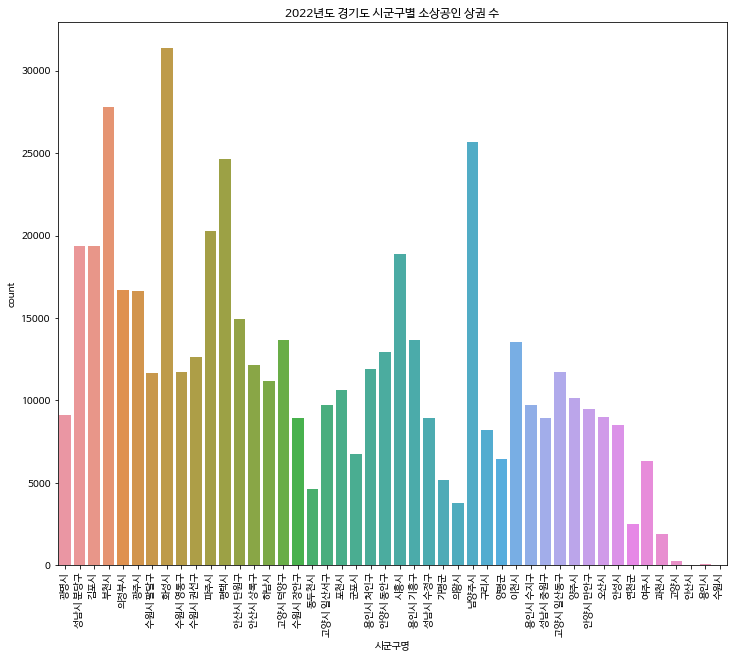

In [ ]:
rcParams['figure.figsize'] = 12,10

sns.countplot(x="시군구명", data= Gyeonggi_22_1Q_)
plt.xticks(rotation=90)
plt.title("2022년도 경기도 시군구별 소상공인 상권 수")
plt.show()

**경기도 지역별 분석**

1) 서울의 남쪽

수원, 화성, 평택 등 서울 남쪽에 있는 지역의 상권이 발달해있습니다.

서울의 높은 인구 밀도로 인하여, 서울과 인접한 경기도 지역이 주거도시로 발전하는 모습으로 판단됩니다.

부천은 서울과 인천 사이에 있는 지역으로, 대형마트와 백화점이 밀집되어 있습니다. 부천에 인접한 시흥도 상권 수가 많습니다.

2) 서울의 북서쪽

고양, 파주의 상권이 발달해있습니다. 특히 고양시는 면적이 넓지 않다는 점을 감안하면

서울에 인접해있다는 이점으로 상권 발전이 이루어진 것 같습니다. 

3) 서울의 동쪽

남양주시는 상권이 빠르게 발전하고 있습니다.

2000년대 이후 재개발 사업이 진행된 지역으로, 서울의 근교 지역으로 자리를 잡고 있습니다.

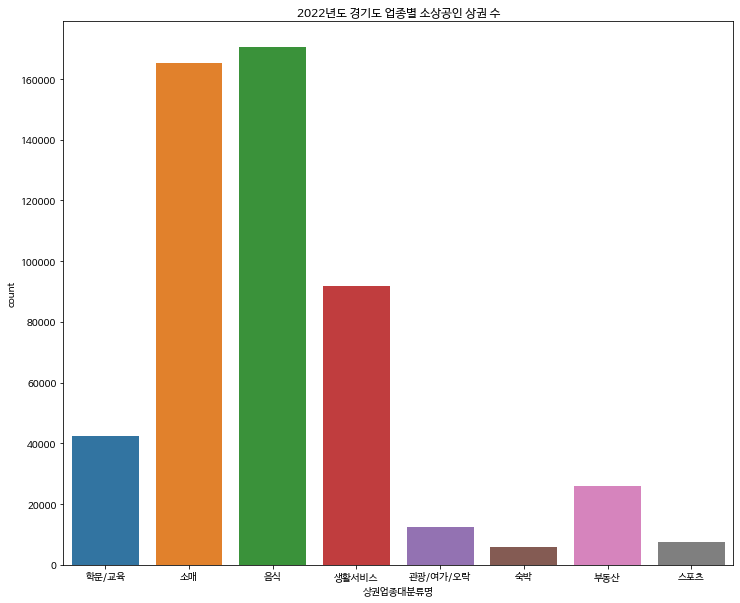

In [ ]:
rcParams['figure.figsize'] = 12,10

sns.countplot(x="상권업종대분류명", data= Gyeonggi_22_1Q_)
plt.title("2022년도 경기도 업종별 소상공인 상권 수")
plt.show()

## 2019년~2021년 경기도 : 업종 상가 수

In [ ]:
# 팬데믹 이전과 비교를 위해 19년도, 20년도 데이터를 불러오겠습니다.
Gyeonggi_19_1Q = pd.read_csv("/content/drive/MyDrive/소상공인데이터/소상공인시장진흥공단_상가(상권)정보_경기_201903.csv")
preprocessing(Gyeonggi_19_1Q)

Gyeonggi_20_1Q = pd.read_csv("/content/drive/MyDrive/소상공인데이터/소상공인시장진흥공단_상가(상권)정보_경기_202003.csv")
preprocessing(Gyeonggi_20_1Q)

Gyeonggi_21_1Q = pd.read_csv("/content/drive/MyDrive/소상공인데이터/소상공인시장진흥공단_상가(상권)정보_경기_202103.csv")
preprocessing(Gyeonggi_21_1Q)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# 19~22년도 비교를 위해 동일한 형태의 pivot table을 만들겠습니다.
pivot_Gyeonggi_19_1Q = pd.pivot_table(data=Gyeonggi_19_1Q, index="시군구명", columns="상권업종대분류명", values="상가업소번호", aggfunc=['count'], margins=True, margins_name='합계', fill_value=0)
pivot_Gyeonggi_20_1Q = pd.pivot_table(data=Gyeonggi_20_1Q, index="시군구명", columns="상권업종대분류명", values="상가업소번호", aggfunc=['count'], margins=True, margins_name='합계', fill_value=0)
pivot_Gyeonggi_21_1Q = pd.pivot_table(data=Gyeonggi_21_1Q, index="시군구명", columns="상권업종대분류명", values="상가업소번호", aggfunc=['count'], margins=True, margins_name='합계', fill_value=0)

In [ ]:
# 연도별, 업종별 상가 수입니다.

dfG = pd.DataFrame([(list(pivot_Gyeonggi_19_1Q.loc["합계"])), (list(pivot_Gyeonggi_20_1Q.loc["합계"])), (list(pivot_Gyeonggi_21_1Q.loc["합계"])), (list(pivot_Gyeonggi_22_1Q.loc["합계"]))], columns=list(pivot_Gyeonggi_19_1Q["count"].columns), index=["2019","2020","2021","2022"])
dfG = dfG.transpose()
dfG

,2019,2020,2021,2022
관광/여가/오락,24579,19446,11880,12553
부동산,30198,25817,22650,25789
생활서비스,128377,101694,82655,91887
소매,278558,209550,158717,165375
숙박,12620,6513,5566,5737
스포츠,348,478,1311,7560
음식,284129,212179,185340,170513
학문/교육,72277,59311,40726,42307
합계,831086,634988,508845,521721


2020년 데이터 관찰 결과, "생활서비스" 업종과 "소매" 업종의 데이터가 존재하지 않습니다.

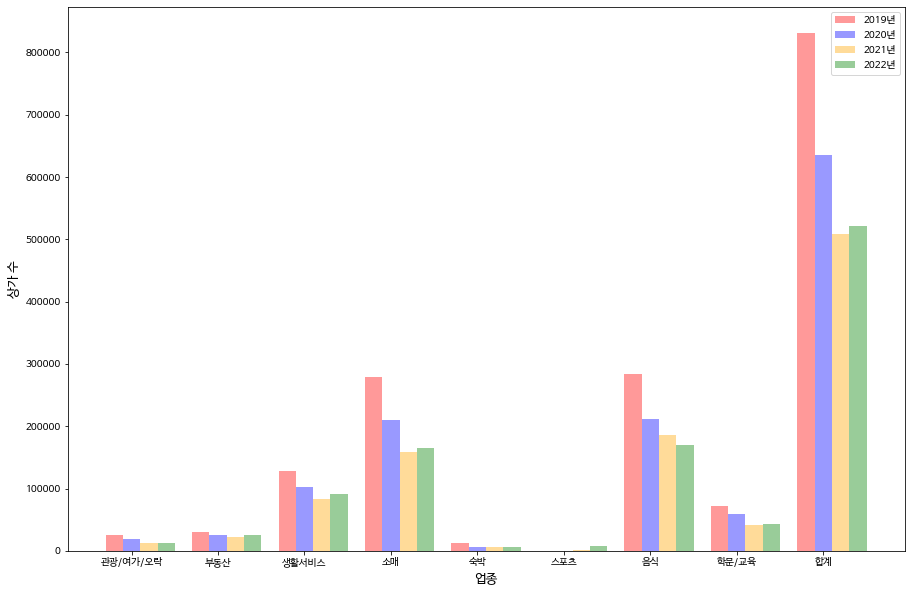

In [ ]:
# 연도별 업종별 상가 수를 막대그래프로 보겠습니다.

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(15,10))
bar_width = 0.2
index = np.arange(9) # 업종 수

# 각 업종로 4개 년도의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, dfG['2019'], bar_width, alpha=0.4, color='red', label='2019년')
b2 = plt.bar(index + bar_width, dfG['2020'], bar_width, alpha=0.4, color='blue', label='2020년')
b2 = plt.bar(index + 2*bar_width, dfG['2021'], bar_width, alpha=0.4, color='orange', label='2021년')
b3 = plt.bar(index + 3*bar_width, dfG['2022'], bar_width, alpha=0.4, color='green', label='2022년')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 9 + bar_width, 1), list(df.transpose().index))

# x축, y축 이름 및 범례 설정
plt.xlabel('업종', size = 13)
plt.ylabel('상가 수', size = 13)
plt.legend()
plt.show()

서울과 유사하게 2020년에 크게 감소한 뒤,

2022년까지도 이전 수준을 회복하지 못하고 있습니다.

숙박이나 스포츠는 절대적인 수가 적어 변화의 추이가 보이지 않습니다.

변화율로 접근해볼 필요가 있다고 판단됩니다.

In [ ]:
# 업종별로 상가 수 "변화율"을 보겠습니다.
sectors=[]
per_change1920=[]
per_change2021=[]
per_change2122=[]
for i in range(0,len(pivot_Gyeonggi_22_1Q.columns)):
    sectors.append(((pivot_Gyeonggi_22_1Q.loc["합계"]-pivot_Gyeonggi_19_1Q.loc["합계"])/(pivot_Gyeonggi_19_1Q.loc["합계"])*100).keys()[i][1])
    per_change1920.append(((pivot_Gyeonggi_20_1Q.loc["합계"]-pivot_Gyeonggi_19_1Q.loc["합계"])/(pivot_Gyeonggi_19_1Q.loc["합계"])*100)[i])
    per_change2021.append(((pivot_Gyeonggi_21_1Q.loc["합계"]-pivot_Gyeonggi_20_1Q.loc["합계"])/(pivot_Gyeonggi_20_1Q.loc["합계"])*100)[i])
    per_change2122.append(((pivot_Gyeonggi_22_1Q.loc["합계"]-pivot_Gyeonggi_21_1Q.loc["합계"])/(pivot_Gyeonggi_21_1Q.loc["합계"])*100)[i])
df_per_change = pd.DataFrame(np.round([per_change1920, per_change2021, per_change2122],2), columns=sectors, index=["2019-2020","2020-2021","2021-2022"]).transpose()
df_per_change

,2019-2020,2020-2021,2021-2022
관광/여가/오락,-20.88,-38.91,5.66
부동산,-14.51,-12.27,13.86
생활서비스,-20.78,-18.72,11.17
소매,-24.77,-24.26,4.19
숙박,-48.39,-14.54,3.07
스포츠,37.36,174.27,476.66
음식,-25.32,-12.65,-8.00
학문/교육,-17.94,-31.33,3.88
합계,-23.60,-19.87,2.53


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


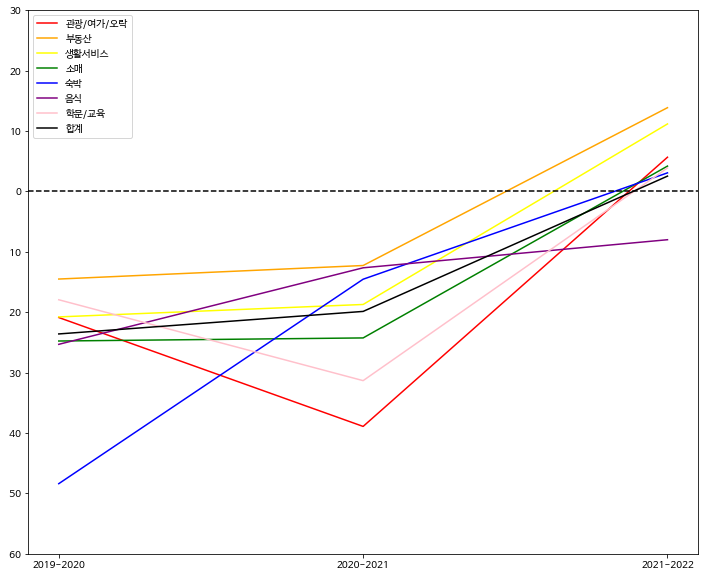

In [ ]:
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['관광/여가/오락'], color = 'red')
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['부동산'], color = 'orange')
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['생활서비스'], color = 'yellow')
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['소매'], color = 'green')
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['숙박'], color = 'blue')
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['음식'], color = 'purple')
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['학문/교육'], color = 'pink')
plt.plot(df_per_change.transpose().index, df_per_change.transpose()['합계'], color = 'black')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend(df_per_change.transpose().drop(["스포츠"], axis=1).columns)
plt.axis([-0.1, 2.1, -60, 30])
plt.show()


팬데믹이 소상공인에 직접적 타격을 주기 시작한 2021년 모든 업종에서 상가 수가 감소했습니다.

특히 숙박 및 관광/여가/오락 업종에서 큰 감소세를 보였습니다.

2022년에는 대부분의 업종에서 다시 증가세로 돌아왔지만,

그 정도가 미미하여 2021년의 감소폭을 회복하지 못하고 있습니다.

심지어 **음식** 업종에서는 아직 미미한 감소세에 머무르고 있습니다.

## 웹 크롤링으로 Gyeonggi.csv 만들기

In [ ]:
# 웹 드라이버 객체 생성
browser = webdriver.Chrome('chromedriver', options = options)

In [ ]:
# 페이지 접속
browser.get("https://sg.sbiz.or.kr/godo/stat/upso.sg")

In [ ]:
# 지역 선택
browser.find_element("xpath","/html/body/div[1]/div[2]/div[1]/div[2]/div/div/div[1]/div/div[1]/ul/li[1]/div/div[2]/a").click()

In [ ]:
# 스크롤 내리기
itemlist = browser.find_element("xpath", "/html/body/div[2]/div/div[2]/div/div[1]/div/ul/li[1]/div")

In [ ]:
browser.execute_script("arguments[0].scrollBy(0, 100);", itemlist)

In [ ]:
# 경기도 선택
browser.find_element("xpath","/html/body/div[2]/div/div[2]/div/div[1]/div/ul/li[1]/div/ul/li[10]/label").click()

In [ ]:
# 시군구 전체
browser.find_element("xpath","/html/body/div[2]/div/div[2]/div/div[1]/div/ul/li[2]/div/ul/li[1]/label").click()

In [ ]:
# 확인
browser.find_element("xpath","/html/body/div[2]/div/div[2]/div/div[2]/a[2]/span").click()

In [ ]:
# 현황 보기
browser.find_element("xpath","/html/body/div[1]/div[2]/div[1]/div[2]/div/div/div[1]/div/div[2]/a/span").click()

In [ ]:
# 크롤링
z= browser.find_elements(By.CSS_SELECTOR,'#upsoTable > tr > td')

In [ ]:
# 페이지에 있는 표에서, 각각 열을 하나의 리스트로 받아서 리스트를 붙여서 Dataframe으로 만들 계획

# 빈 리스트 만들어주고
i = 0
district_Gyeonggi = []
Gyeonggi_2021_1_6 = []
Gyeonggi_2021_7_12 = []
Gyeonggi_per_change = []

# 같은 열에 있는 값끼리 모아서 열마다 리스트를 만듬
for x in z :
    if (i == 0) or (i%4 ==0):
        district_Gyeonggi.append(x.text)
    elif (i%4 ==1):
        Gyeonggi_2021_1_6.append(x.text)
    elif (i%4 ==2):
        Gyeonggi_2021_7_12.append(x.text)
    else:
        Gyeonggi_per_change.append(x.text)
    i += 1


In [ ]:
district_Gyeonggi

['경기도',
 '┗ 수원시',
 '┗ 성남시',
 '┗ 의정부시',
 '┗ 안양시',
 '┗ 부천시',
 '┗ 광명시',
 '┗ 평택시',
 '┗ 동두천시',
 '┗ 안산시',
 '┗ 고양시',
 '┗ 과천시',
 '┗ 구리시',
 '┗ 남양주시',
 '┗ 오산시',
 '┗ 시흥시',
 '┗ 군포시',
 '┗ 의왕시',
 '┗ 하남시',
 '┗ 용인시',
 '┗ 파주시',
 '┗ 이천시',
 '┗ 안성시',
 '┗ 김포시',
 '┗ 화성시',
 '┗ 광주시',
 '┗ 양주시',
 '┗ 포천시',
 '┗ 여주시',
 '┗ 연천군',
 '┗ 가평군',
 '┗ 양평군']

In [ ]:
# 서울과 동일하게 지역 이름에 있는 "┗ "제거
for i in range(len(district_Gyeonggi)):
    if district_Gyeonggi[i].startswith("┗"):
        district_Gyeonggi[i] = district_Gyeonggi[i][2:]

In [ ]:
# DataFrame 만들기
Gyeonggi_21_df = pd.DataFrame([district_Gyeonggi, Gyeonggi_2021_1_6, Gyeonggi_2021_7_12, Gyeonggi_per_change]).transpose()
Gyeonggi_21_df.columns=["행정구역","21'상","21'하","증감률"]

In [ ]:
Gyeonggi_21_df

,행정구역,21'상,21'하,증감률
0,경기도,"598,036","582,321",-2.63%
1,수원시,"51,573","49,486",-4.05%
2,성남시,"41,309","40,612",-1.69%
3,의정부시,"17,774","17,795",0.12%
4,안양시,"26,496","25,056",-5.43%
5,부천시,"26,831","26,225",-2.26%
6,광명시,"9,695","9,606",-0.92%
7,평택시,"26,327","26,816",1.86%
8,동두천시,"5,753","5,581",-2.99%
9,안산시,"30,605","28,530",-6.78%


In [ ]:
# 웹 드라이버 객체 생성
browser = webdriver.Chrome('chromedriver', options = options)

In [ ]:
# 페이지 접속
browser.get("https://sg.sbiz.or.kr/godo/stat/area.sg")

In [ ]:
# 지역 선택
browser.find_element("xpath","/html/body/div[1]/div[2]/div[1]/div[2]/div/div/div[1]/div/div[1]/ul/li[1]/div/div[2]/a").click()

In [ ]:
# 스크롤 내리기
itemlist = browser.find_element("xpath", "/html/body/div[2]/div/div[2]/div/div[1]/div/ul/li[1]/div/ul")

In [ ]:
browser.execute_script("arguments[0].scrollBy(0, 100);", itemlist)

In [ ]:
# 경기도 선택
browser.find_element("xpath","/html/body/div[2]/div/div[2]/div/div[1]/div/ul/li[1]/div/ul/li[10]").click()

In [ ]:
# 구 전체
browser.find_element("xpath","/html/body/div[2]/div/div[2]/div/div[1]/div/ul/li[2]/div/ul/li[1]").click()

In [ ]:
# 확인
browser.find_element("xpath","/html/body/div[2]/div/div[2]/div/div[2]/a[2]").click()

In [ ]:
# 현황 보기
browser.find_element("xpath","/html/body/div[1]/div[2]/div[1]/div[2]/div/div/div[1]/div/div[2]/a").click()

In [ ]:
# 크롤링
Z= browser.find_elements(By.CSS_SELECTOR,'#tableBody > tr > td')

In [ ]:
# District_Geonggi는 아까 만들었으니 pass, 나머지 열은 동일한 방식

i=0
Gyeonggi_households = []
Gyeonggi_population = []
Gyeonggi_facilities = []
Gyeonggi_attrac_fac = []
Gyeonggi_area = []
Gyeonggi_store = []
Gyeonggi_store_house = []
Gyeonggi_fac_house = []
for x in Z:
    if (i == 0) or (i%9 ==0):
        pass
    elif (i%9 == 1):
        Gyeonggi_households.append(x.text)
    elif (i%9 == 2):
        Gyeonggi_population.append(x.text)
    elif (i%9 == 3):
        Gyeonggi_facilities.append(x.text)
    elif (i%9 == 4):
        Gyeonggi_attrac_fac.append(x.text)
    elif (i%9 == 5):
        Gyeonggi_area.append(x.text)
    elif (i%9 == 6):
        Gyeonggi_store.append(x.text)
    elif (i%9 == 7):
        Gyeonggi_store_house.append(x.text)
    else:
        Gyeonggi_fac_house.append(x.text)
    i +=1

In [ ]:
# DataFrame 만들기
Gyeonggi_ = pd.DataFrame([Gyeonggi_households, Gyeonggi_population, Gyeonggi_facilities, Gyeonggi_attrac_fac, Gyeonggi_area, Gyeonggi_store, Gyeonggi_store_house, Gyeonggi_fac_house]).transpose()
Gyeonggi_.columns=["총가구수", "총인구수","주요시설수","집객시설수","아파트 면적당 기준시가","업소수","업소당가구수","업소당시설물수"]

In [ ]:
Gyeonggi = pd.concat([Gyeonggi_21_df,Gyeonggi_], axis=1)

In [ ]:
Gyeonggi

,행정구역,21'상,21'하,증감률,총가구수,총인구수,주요시설수,집객시설수,아파트 면적당 기준시가,업소수,업소당가구수,업소당시설물수
0,경기도,"598,036","582,321",-2.63%,"4,925,290","12,583,094","41,624","58,249","6,292,004","598,863",8,0.17
1,수원시,"51,573","49,486",-4.05%,"467,635","1,189,795","4,026","5,435","6,257,551","55,660",8,0.17
2,성남시,"41,309","40,612",-1.69%,"392,992","973,188","3,894","4,772","9,470,001","51,303",8,0.17
3,의정부시,"17,774","17,795",0.12%,"173,546","434,769","1,611","2,052","5,396,266","22,541",8,0.16
4,안양시,"26,496","25,056",-5.43%,"223,425","595,542","2,104","2,847","7,566,859","30,674",7,0.16
5,부천시,"26,831","26,225",-2.26%,"328,513","848,593","2,590","3,332","6,014,841","31,052",11,0.19
6,광명시,"9,695","9,606",-0.92%,"128,034","343,480",784,952,"7,252,676","11,315",11,0.15
7,평택시,"26,327","26,816",1.86%,"192,130","465,544","1,667","2,584","4,637,380","26,173",7,0.16
8,동두천시,"5,753","5,581",-2.99%,"42,268","98,101",423,588,"3,090,704","5,612",8,0.18
9,안산시,"30,605","28,530",-6.78%,"282,071","695,793","2,393","3,152","5,643,152","31,034",9,0.18


## 업종별 팬데믹의 영향

### 1) 매장 커버리지 지수

매장 커버리지 지수 (인구 수 / 매장 수)를 보겠습니다.

매장 하나가 몇 명의 사람들을 커버하는지를 보여주어

클수록 인구 대비 매장 수가 많이 감소했음을 의미합니다.

In [ ]:
# "총인구수" 변수의 ","제거
for i in range(len(Gyeonggi)):
  Gyeonggi["총인구수"][i] = Gyeonggi["총인구수"][i].replace(",","")

# 변수를 int로 만들어줍니다.
for i in range(len(Gyeonggi)):
  Gyeonggi["총인구수"][i] = int(Gyeonggi["총인구수"][i])

# 2022년 인구 데이터는 준비되었습니다.

In [ ]:
# 2019 ~ 2021년 인구 데이터는 통계청에서 다운받습니다.
Gyeonggi_pop = pd.read_csv('/content/drive/MyDrive/소상공인데이터/경기지역별인구_2019_2021.csv', encoding='cp949')
Gyeonggi_pop = Gyeonggi_pop.drop([0])
Gyeonggi_pop = Gyeonggi_pop.set_index("행정구역별(읍면동)")
Gyeonggi_pop = Gyeonggi_pop.sort_index()
Gyeonggi_pop

,2019,2020,2021
행정구역별(읍면동),,,
가평군,59823,60233,59714
경기도,13300900,13511676,13652529
고양시,1024645,1045497,1049513
과천시,53830,58018,65880
광명시,313462,298116,290345
광주시,375238,385141,387700
구리시,192270,192051,187798
군포시,275154,275571,270443
김포시,442910,474546,491572


In [ ]:
# 2022년 인구 데이터를 추가해줍니다.
Gyeonggi_pop["2022"] = list(Gyeonggi.sort_values("행정구역")["총인구수"])
Gyeonggi_pop = Gyeonggi_pop.sort_values("2022")
Gyeonggi_pop = Gyeonggi_pop.sort_values("2022", ascending=False)

In [ ]:
Gyeonggi_pop.head()

,2019,2020,2021,2022
행정구역별(읍면동),,,,
경기도,13300900,13511676,13652529,12583094
수원시,1214986,1210150,1208337,1189795
고양시,1024645,1045497,1049513,1029854
용인시,1052529,1066975,1067347,980268
성남시,919895,922025,913482,973188


In [ ]:
dfG = dfG.transpose()
dfG

,관광/여가/오락,부동산,생활서비스,소매,숙박,스포츠,음식,학문/교육,합계
2019,24579,30198,128377,278558,12620,348,284129,72277,831086
2020,19446,25817,101694,209550,6513,478,212179,59311,634988
2021,11880,22650,82655,158717,5566,1311,185340,40726,508845
2022,12553,25789,91887,165375,5737,7560,170513,42307,521721


In [ ]:
for i in range(len(dfG)):
  locals()['count{}g'.format(i+2019)] = []
  for j in range(len(dfG.columns)):
    locals()['count{}g'.format(i+2019)].append(round(int(Gyeonggi_pop.iloc[0][i]) / dfG.iat[i,j] ,2))

Gyeonggi_coverage = pd.DataFrame([count2019g, count2020g, count2021g, count2022g], columns=dfG.columns, index=dfG.index)
Gyeonggi_coverage
# 업종별 매장 커버리지 지수(매장 당 인구 수)

,관광/여가/오락,부동산,생활서비스,소매,숙박,스포츠,음식,학문/교육,합계
2019,541.15,440.46,103.61,47.75,1053.95,38220.98,46.81,184.03,16.00
2020,694.83,523.36,132.87,64.48,2074.57,28267.10,63.68,227.81,21.28
2021,1149.20,602.76,165.17,86.02,2452.84,10413.83,73.66,335.23,26.83
2022,1002.40,487.92,136.94,76.09,2193.32,1664.43,73.80,297.42,24.12


스포츠를 제외한 모든 업종에서 2021년 매장 커버리지 지수가 크게 상승했습니다.

이는 인구의 변동을 고려하더라도 매장의 수가 크게 감소했음을 의미합니다.

2022년에는 매장 커버리지 지수가 감소하고 있지만, 그 정도가 미미하여

팬데믹 이전과 비교하면 매장 수가 많이 줄어든 상태입니다.

다만 부동산 업종은 2022년 다시 2019년 수준으로 회복했습니다.

### 2) 수정 매출액 지수

수정 매출 지수는 "매출 지수 / (매장 수 * 인구 수)" 로 계산합니다.

매장 수가 감소하면 해당 업종의 매출액도 감소하기 마련이고

인구 수가 감소하면 매출액도 감소하기 마련입니다.

팬데믹으로 인한 피해만을 관찰하기 위해

매장 수의 감소와 인구 수의 감소를 보정한 수정 매출 지수를 제안해봅니다.

In [ ]:
# 첫 번째로 매출액을 구하는 단계입니다.
Sales = pd.read_csv('/content/drive/MyDrive/소상공인데이터/서울경기업종별통계_20192020.csv')
Gyeonggi_Sales = Sales[Sales["시도별"]=="경기도"]
Gyeonggi_Sales

,시도별,산업별,"총 사업체수 (개, 2019)","총 종사자수 (명, 2019)","총 매출액 (백만원, 2019)","총 사업체수 (개, 2020)","총 종사자수 (명, 2020)","총 매출액 (백만원, 2020)"
12,경기도,전산업,614081,1564688,173923940,657738,1366285,181635183
13,경기도,제조업,105491,397738,58873900,111471,370746,60132030
14,경기도,건설업,24478,106642,11778133,29159,84706,14979635
15,경기도,도매 및 소매업,177688,400413,70236595,187638,334805,70997811
16,경기도,숙박 및 음식점업,133454,334839,18843567,146626,285642,20164295
17,경기도,정보통신업,4058,9214,923830,4800,9610,967485
18,경기도,부동산업,30018,44766,1899256,31618,40914,2592874
19,경기도,전문과학기술서비스업,9021,20910,1705098,10469,20642,1931602
20,경기도,"사업시설관리, 사업지원 및 임대 서비스업",9626,24933,1803487,11661,22450,2206313
21,경기도,교육 서비스업,32863,77793,2447453,33542,69695,2217503


In [ ]:
# 불필요한 정보는 제거하고 매장 수 데이터프레임의 형식과 통일시킵니다.
Gyeonggi_Sales = Gyeonggi_Sales.loc[[18,23,15,21,22,16],:][["산업별","총 매출액 (백만원, 2019)","총 매출액 (백만원, 2020)"]].transpose()
Gyeonggi_Sales = Gyeonggi_Sales.rename(columns=Gyeonggi_Sales.iloc[0])
Gyeonggi_Sales = Gyeonggi_Sales[1:3]
Gyeonggi_Sales["합계"] = Gyeonggi_Sales.sum(axis=1)
Gyeonggi_Sales["합계"] = [int(Gyeonggi_Sales["합계"][0]), int(Gyeonggi_Sales["합계"][1])]
Gyeonggi_Sales.columns = ["부동산", "생활서비스",  "소매", "학문/교육",  "예술/스포츠/여가",  "숙박/음식점", "합계"]
Gyeonggi_Sales

,부동산,생활서비스,소매,학문/교육,예술/스포츠/여가,숙박/음식점,합계
"총 매출액 (백만원, 2019)",1899256,3621289,70236595,2447453,1791330,18843567,98839490
"총 매출액 (백만원, 2020)",2592874,3908550,70997811,2217503,1537085,20164295,101418118


In [ ]:
# 매출 지수를 통하여 매출액을 추정해줍니다.
# 예시) 2020년 <매출액 100만원> & <2020년 매출지수 100> & <2021년 매출지수 200> ---> <2021년 매출액 200만원>
# 매출지수가 없는 부동산은 변화 추세가 유지된다고 가정
Gyeonggi_Sales_indic_2020 = [100, 88.06, 105.67, 93.38, 63.8, 66.28, 76.25]
Gyeonggi_Sales_indic_2021 = [105, 112.53, 127.94, 248.37, 83.4, 60.69, 121.3]
Gyeonggi_Sales_indic_2022 = [110, 132.08, 129.74, 296.62, 118.56, 62.33, 143.15]

Gyeonggi_Sales = Gyeonggi_Sales.transpose()
Gyeonggi_Sales["총 매출액 (백만원, 2021)"] = [0] * len(Gyeonggi_Sales)
Gyeonggi_Sales["총 매출액 (백만원, 2022)"] = [0] * len(Gyeonggi_Sales)

for i in range(len(Gyeonggi_Sales)):
  Gyeonggi_Sales["총 매출액 (백만원, 2021)"][i] = Gyeonggi_Sales["총 매출액 (백만원, 2020)"][i] * Gyeonggi_Sales_indic_2021[i] / Gyeonggi_Sales_indic_2020[i]
  Gyeonggi_Sales["총 매출액 (백만원, 2022)"][i] = Gyeonggi_Sales["총 매출액 (백만원, 2021)"][i] * Gyeonggi_Sales_indic_2022[i] / Gyeonggi_Sales_indic_2021[i]

Gyeonggi_Sales = Gyeonggi_Sales.transpose()
Gyeonggi_Sales["합계"] = Gyeonggi_Sales.sum(axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
Gyeonggi_Sales

,부동산,생활서비스,소매,학문/교육,예술/스포츠/여가,숙박/음식점,합계
"총 매출액 (백만원, 2019)",1899256,3621289,70236595,2447453,1791330,18843567,197678980.0
"총 매출액 (백만원, 2020)",2592874,3908550,70997811,2217503,1537085,20164295,202836236.0
"총 매출액 (백만원, 2021)",2722517,4994652,85960631,5898064,2009292,18463655,281386748.0
"총 매출액 (백만원, 2022)",2852160,5862380,87170019,7043860,2856374,18962590,315147429.0


In [ ]:
# 두 번째로 매장 수를 구하는 단계입니다.
# 매출 데이터의 업종 구분 방식과 동일하게 병합해줍니다.
dfG_adj = dfG.copy()
dfG_adj["예술/스포츠/여가"] = dfG_adj["관광/여가/오락"] + dfG_adj["스포츠"]
dfG_adj["숙박/음식점"] = dfG_adj["숙박"] + dfG_adj["음식"]
dfG_adj.drop(columns=["관광/여가/오락", "숙박", "음식", "스포츠"], inplace=True)
dfG_adj = dfG_adj[["부동산","생활서비스","소매","학문/교육","예술/스포츠/여가","숙박/음식점","합계"]]
dfG_adj

,부동산,생활서비스,소매,학문/교육,예술/스포츠/여가,숙박/음식점,합계
2019,30198,128377,278558,72277,24927,296749,831086
2020,25817,101694,209550,59311,19924,218692,634988
2021,22650,82655,158717,40726,13191,190906,508845
2022,25789,91887,165375,42307,20113,176250,521721


In [ ]:
# 세 번째로 인구입니다.
Gyeonggi_pop.transpose()["경기도"]

2019    13300900
2020    13511676
2021    13652529
2022    12583094
Name: 경기도, dtype: object

In [ ]:
# 수정 매출액 지수를 계산해줍니다.
for i in range(len(dfG_adj)):
  locals()['count{}g'.format(i+2019)] = []
  for j in range(len(dfG_adj.columns)):
    locals()['count{}g'.format(i+2019)].append(round( Gyeonggi_Sales.iat[i,j] * 1000000 / dfG_adj.iat[i,j] / int(Gyeonggi_pop.transpose()["경기도"][i]) ,4))

Gyeonggi_sales_adj = pd.DataFrame([count2019g, count2020g, count2021g, count2022g], columns=dfG_adj.columns, index=dfG_adj.index)
Gyeonggi_sales_adj.drop(columns=["합계"])

,부동산,생활서비스,소매,학문/교육,예술/스포츠/여가,숙박/음식점
2019,4.7285,2.1208,18.9569,2.5459,5.4029,4.7741
2020,7.4330,2.8445,25.0754,2.7671,5.7097,6.8240
2021,8.8042,4.4261,39.6701,10.6078,11.1571,7.0841
2022,8.7893,5.0703,41.8900,13.2316,11.2863,8.5503


수정 매출액 지수를 관찰한 결과

1) 부동산 업종은 소폭 증가했습니다.

부동산 업소 수가 많이 늘어났음에도 불구하고 매출이 증가했다는 점에서,

부동산 업종의 타격은 타 업종에 비해 미미한 것으로 판단됩니다. (혹은 호황)

--

2) 생활서비스, 소매, 숙박/음식점 업종도 소폭 증가했습니다.

하지만 부동산 업종과 다르게 매장 수는 감소한 업종입니다.

음식점은 2021년 크게 상승하는데, 이의 원인은 매출의 증가가 아니라 매장 수 30% 감소로 분석됩니다.

--

3) 학문/교육 업종은 크게 늘었습니다.

학문/교육 업종은 좁은 공간에 많은 사람들이 모이는 업종이고,

정부의 사회적 거리두기 정책이 유연하게 시행된 업종입니다.

또한 바깥 활동이 줄어들면서 비대면으로도 충분히 활성화될 수 있는 업종이기에 매출의 타격이 적은 것으로 판단됩니다.

__

4) 서울 지역에서는 수정 매출액 지수가 감소하는 반면, 경기도 지역은 소폭 증가합니다.

이는 매출액의 관점에서 보았을 때 서울보다 타격이 작다고 분석할 근거가 됩니다.

### 3) 코로나 피해지수

매장 수 변화율과 매출액 변화율에 가중치를 곱하여 산출한 지수입니다.

마지막에는 -가 곱해지기 때문에,

매장 수와 매출액이 줄어들면 코로나 피해지수는 커집니다.

In [ ]:
# 경기도 20-21 & 21-22 인당 매장 수 변화율

Gyeonggi_per_pop_20_21 = []
for i in range(len(dfG.columns)):
  Gyeonggi_per_pop_20_21.append((dfG.loc["2021"][i]/int(Gyeonggi_pop.loc["경기도"]["2021"]) - dfG.loc["2020"][i]/int(Gyeonggi_pop.loc["경기도"]["2020"])) / (dfG.loc["2020"][i]/int(Gyeonggi_pop.loc["경기도"]["2020"]))*100)

Gyeonggi_per_pop_21_22 = []
for i in range(len(dfG.columns)):
  Gyeonggi_per_pop_21_22.append((dfG.loc["2022"][i]/int(Gyeonggi_pop.loc["경기도"]["2022"]) - dfG.loc["2021"][i]/int(Gyeonggi_pop.loc["경기도"]["2021"])) / (dfG.loc["2021"][i]/int(Gyeonggi_pop.loc["경기도"]["2021"]))*100)

Gyeonggi_per_pop = pd.DataFrame([Gyeonggi_per_pop_20_21, Gyeonggi_per_pop_21_22], columns=df.columns, index=["2020-2021","2021-2022"])
Gyeonggi_per_pop

,관광/여가/오락,부동산,생활서비스,소매,숙박,스포츠,음식,학문/교육,합계
2020-2021,-39.538033,-13.172250,-19.560398,-25.039600,-15.421839,171.438165,-13.550422,-32.043246,-20.692162
2021-2022,14.645432,23.535553,20.617580,13.050393,11.832315,525.669192,-0.180819,12.710958,11.244481


In [ ]:
# 경기도 19-20 & 20-21 매출액 변화율

Gyeonggi_Sales_19_20 = []
for i in range(len(Gyeonggi_Sales.columns)):
  Gyeonggi_Sales_19_20.append((Gyeonggi_Sales[Gyeonggi_Sales.columns[i]][1]-Gyeonggi_Sales[Gyeonggi_Sales.columns[i]][0])/Gyeonggi_Sales[Gyeonggi_Sales.columns[i]][0]*100)

Gyeonggi_Sales_20_21 = []
for i in range(len(Gyeonggi_Sales.columns)):
  Gyeonggi_Sales_20_21.append((Gyeonggi_Sales[Gyeonggi_Sales.columns[i]][2]-Gyeonggi_Sales[Gyeonggi_Sales.columns[i]][1])/Gyeonggi_Sales[Gyeonggi_Sales.columns[i]][1]*100)

Gyeonggi_Sales_change = pd.DataFrame([Gyeonggi_Sales_19_20, Gyeonggi_Sales_20_21], columns=Gyeonggi_Sales.columns, index=["2019-2020","2020-2021"])
Gyeonggi_Sales_change["스포츠"] = Gyeonggi_Sales_change["예술/스포츠/여가"]
Gyeonggi_Sales_change["숙박"] = Gyeonggi_Sales_change["숙박/음식점"]

In [ ]:
Gyeonggi_Sales_change.rename(columns={"숙박/음식점":"음식", "예술/스포츠/여가":"관광/여가/오락"}, inplace=True)
Gyeonggi_Sales_change = Gyeonggi_Sales_change.reindex(columns=Gyeonggi_per_pop.columns)
Gyeonggi_Sales_change

,관광/여가/오락,부동산,생활서비스,소매,숙박,스포츠,음식,학문/교육,합계
2019-2020,-14.193086,36.520511,7.932562,1.083788,7.008907,-14.193086,7.008907,-9.395482,2.608905
2020-2021,30.720943,4.999973,27.787850,21.075044,-8.433917,30.720943,-8.433917,165.977724,38.726075


In [ ]:
# 경기도 코로나 피해지수 산출
# weight_list는 "20-21", "21-22" 매장 수 변화율, 그리고 "19-20", "20-21" 매출액 변화율의 가중치 순으로 입력합니다.
# 합이 반드시 1일 필요는 없으니 비율만 입력합니다. ex)[2,8,4,6]이면 [0.1, 0.4, 0.2, 0,3]으로 자동 환산됩니다.

Gyeonggi_Covid_Harm = []
def Covid_Harm_Gyeonggi(weight_list_4):
  for i in range(len(Gyeonggi_per_pop.columns)):
    Gyeonggi_Covid_Harm.append(-weight_list_4[0]/sum(weight_list_4)*Gyeonggi_per_pop[Gyeonggi_per_pop.columns[i]][0] - weight_list_4[1]/sum(weight_list_4)*Gyeonggi_per_pop[Gyeonggi_per_pop.columns[i]][1] - weight_list_4[2]/sum(weight_list_4)*Gyeonggi_Sales_change[Gyeonggi_Sales_change.columns[i]][0] - weight_list_4[3]/sum(weight_list_4)*Gyeonggi_Sales_change[Gyeonggi_Sales_change.columns[i]][1])
  CH_dfG = pd.DataFrame([Gyeonggi_Covid_Harm], columns=Gyeonggi_per_pop.columns, index=["Covid_Harm"])
  
  ch_lst = list(CH_dfG.loc["Covid_Harm"])
  ch_lst_ = sorted(ch_lst, reverse=True)
  ind=[]
  for i in ch_lst:
    ind.append(ch_lst_.index(i)+1)
  CH_dfG = CH_dfG.transpose()
  CH_dfG["피해 순위"] = ind
  CH_dfG = CH_dfG.sort_values("피해 순위")
  return CH_dfG

Covid_Harm_Gyeonggi([4,2,2,2])

,Covid_Harm,피해 순위
관광/여가/오락,9.580555,1
음식,5.741335,2
숙박,4.087275,3
소매,2.973995,4
합계,-2.239027,5
생활서비스,-3.443439,6
부동산,-7.742307,7
학문/교육,-21.041341,8
스포츠,-177.014676,9


# 결론

In [ ]:
conclusion = pd.concat([df.transpose()[8:], dfG.transpose()[8:]])
conclusion.index= ["서울특별시","경기도"]
conclusion

,2019,2020,2021,2022
서울특별시,382245,391500,315555,330827
경기도,831086,634988,508845,521721


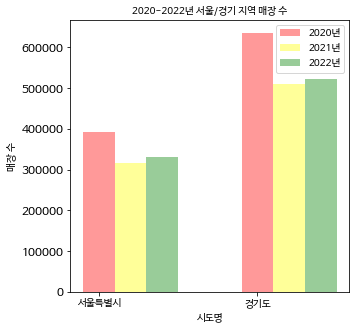

In [ ]:
# 연도별 업종별 상가 수를 막대그래프로 보겠습니다.

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(5,5))
bar_width = 0.2
index = np.arange(2) # 업종 수

# 각 업종로 4개 년도의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index + bar_width, conclusion['2020'], bar_width, alpha=0.4, color='red', label='2020년')
b2 = plt.bar(index + 2 * bar_width, conclusion['2021'], bar_width, alpha=0.4, color='yellow', label='2021년')
b3 = plt.bar(index + 3 * bar_width, conclusion['2022'], bar_width, alpha=0.4, color='green', label='2022년')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 2 + bar_width, 1), list(conclusion.index), size=10)
plt.yticks(size=12)

# x축, y축 이름 및 범례 설정
plt.xlabel('시도명', size = 10)
plt.ylabel('매장 수', size = 10)
plt.title("2020-2022년도 서울/경기 지역 매장 수", size=10)
plt.legend(fontsize=10)
plt.show()

In [ ]:
df_head = df.transpose().sort_values("2019", ascending=False)[1:5]
df_head

,2019,2020,2021,2022
음식,131687,134041,125811,114193
소매,124782,126954,89841,99079
생활서비스,64344,68002,54551,62863
학문/교육,31247,31640,21850,23928


In [ ]:
df_tail = df.transpose().sort_values("2019", ascending=False)[5:]
df_tail

,2019,2020,2021,2022
부동산,15430,15778,13336,15485
관광/여가/오락,11578,11714,7089,7902
숙박,3047,3131,2446,2258
스포츠,130,240,631,5119


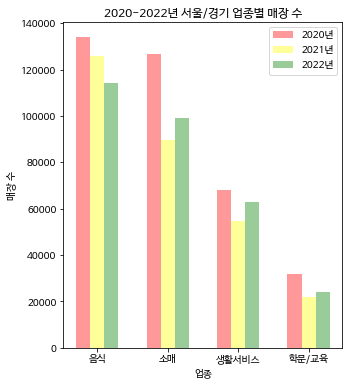

In [ ]:
# 연도별 업종별 상가 수를 막대그래프로 보겠습니다.

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(5,6))
bar_width = 0.2
index = np.arange(4) # 업종 수

# 각 업종로 4개 년도의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df_head['2020'], bar_width, alpha=0.4, color='red', label='2020년')
b2 = plt.bar(index +  bar_width, df_head['2021'], bar_width, alpha=0.4, color='yellow', label='2021년')
b3 = plt.bar(index + 2 * bar_width, df_head['2022'], bar_width, alpha=0.4, color='green', label='2022년')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 4 + bar_width, 1), list(df_head.index))

# x축, y축 이름 및 범례 설정
plt.xlabel('업종', size = 10)
plt.ylabel('매장 수', size = 10)
plt.title("2020-2022년 서울/경기 업종별 매장 수", fontsize=12)
plt.legend(fontsize=10)
plt.show()

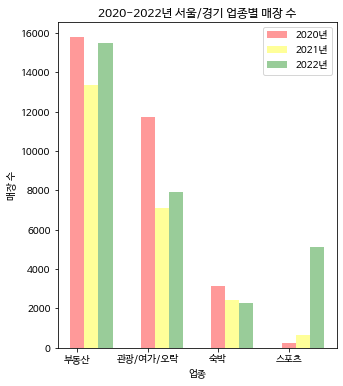

In [ ]:
# 연도별 업종별 상가 수를 막대그래프로 보겠습니다.

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(5,6))
bar_width = 0.2
index = np.arange(4) # 업종 수

# 각 업종로 4개 년도의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index + bar_width, df_tail['2020'], bar_width, alpha=0.4, color='red', label='2020년')
b2 = plt.bar(index + 2 * bar_width, df_tail['2021'], bar_width, alpha=0.4, color='yellow', label='2021년')
b3 = plt.bar(index + 3 * bar_width, df_tail['2022'], bar_width, alpha=0.4, color='green', label='2022년')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 4 + bar_width, 1), list(df_tail.index))

# x축, y축 이름 및 범례 설정
plt.xlabel('업종', size = 10)
plt.ylabel('매장 수', size = 10)
plt.title("2020-2022년 서울/경기 업종별 매장 수", fontsize=12)
plt.legend(fontsize=10)
plt.show()

정부에서는 이미 팬데믹으로 피해가 컸던 업종을 정밀하게 분석하고 있습니다.

하지만 여론은 소상공인 지원에 대한 비판이 많습니다.

아직은 구체적으로 결정된 내용이 없기에 본 분석에서 하나의 예시를 제시해보고자 합니다.

_____

결론1. 서비스, 소매, 숙박, 음식점 업종 지원 유지(또는 확대)

해당 업종은 고객의 방문이 매출로 이어지는 구조를 가지고 있습니다.

특히 서비스 업종 대부분을 차지했던 미용실, 숙박 업종이 그러합니다.

소매 업종과 음식점은 비대면 택배/배달로 판매 경로를 변경하였으나

매출은 감소하였고 매장 유지의 필요성과 여력 모두 줄어들었습니다.

따라서 해당 업종은 팬데믹의 피해가 직접적인 업종이라 판단됩니다.

__

결론2. 부동산 업종 지원 축소

팬데믹 이후 자금의 유동성은 부동산 시장으로 유입되었습니다.

부동산 가격은 크게 올랐고, 부동산 업소는 타 업종과 다르게 오히려 증가했습니다.

따라서 부동산 업종은 타 업종에 비해 피해가 막대하지 않다고 판단됩니다.

__

결론3. 스포츠 업종의 후속 조치

팬데믹 이후 스포츠 업종의 소상공인의 증가율은 약 700% 였습니다.

스크린 골프 등 실내 체육시설이 많아졌기 때문입니다.

비대면 시대가 막을 내리면, 실내 체육시설은 철수하거나 사업을 변경할 것으로 예상됩니다.

대면 시대로의 복귀를 향한 기업의 원활한 준비와 적응을 위하여, 제도적으로도 준비할 필요가 있습니다.

# 후속 분석 및 활용 방안

1) 최근 이슈인 소상공인 지원정책을 제안할 수 있습니다.

소상공인 지원정책은 국민의 혈세로 시행되기에 적재적소에 이루어져야 합니다.

사업을 어렵게 유지하고 있는 소상공인 뿐만 아니라,

본 분석에서 제외된, 폐업 후 부채 부담을 진 소상공인에게도 지원이 필요합니다.

부채 데이터를 확보할 수 있다면, 본 분석보다 심도있는 분석이 가능하다고 판단됩니다.

--

2) 새로운 사업 진출에 방향성을 제시할 수 있습니다.

전국 지역 내 업종의 성장률, 운영 기간, 이용객 등을 고려하여

새로운 매장을 열 때, 어떤 지역에서 어떤 업종을 선택하면 좋을지를 제시하거나

지역별, 업종별 창업 유망성을 제시할 수 있습니다.

# 분석의 한계점

1) 매출 데이터의 부재

매출 데이터는 카드사의 데이터로부터 얻을 수 있는 것으로 알고 있는데, 인터넷으로 검색하여 찾기는 어려웠습니다.

저희는 소상공인진흥공단에서 카드사의 매출액 데이터를 활용하여 만든 매출 지표를 통하여 매출액을 간접적으로 관찰하였습니다.

또한 매출액의 경우 조사 시점과 결과 보도 시점에 차이가 존재하여 2021년의 데이터를 충분히 확보하지 못했습니다.

-

2) 조사 대상의 주관성 개입

소상공인의 경우 기업이 아닌 경우가 존재하기 때문에, 정확한 매출을 측정하기 어렵다고 합니다.

매출이나 실적 데이터에서 소상공인이 느끼는 정도를 표현하는 체감 점수가 도출되는 경우가 있었습니다.

-

3) 데이터의 조사 대상 불일치

하나의 데이터에서 결론을 내리기 어려워 다양한 데이터를 활용했습니다.

하지만 데이터마다 조사 대상이나 표본의 크기가 달랐습니다.

또한 조사 설계 과정에서 업종의 분류를 다르게 정한 경우 임의 조정이 불가피했습니다.

